<a href="https://colab.research.google.com/github/DelMashiry-dev/DelMashiry-dev/blob/main/Realtime_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Medical_Resource_Prediction

owid-covid-data.csv


# Data Understanding

  # Uploading the dataset


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv', nrows=100)
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05            0          0   
1      AFG      Asia  Afghanistan  2020-01-06            0          0   
2      AFG      Asia  Afghanistan  2020-01-07            0          0   
3      AFG      Asia  Afghanistan  2020-01-08            0          0   
4      AFG      Asia  Afghanistan  2020-01-09            0          0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN             0           0                  NaN  ...   
1                 NaN             0           0                  NaN  ...   
2                 NaN             0           0                  NaN  ...   
3                 NaN             0           0                  NaN  ...   
4                 NaN             0           0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
!pip install pandas numpy matplotlib seaborn tensorflow torch pytorch-forecasting streamlit plotly scikit-learn pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Perform Exploratory Data Analysis (EDA)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data in chunks
chunks = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv',
                     chunksize=10000,
                     usecols=['date', 'location', 'new_cases', 'hosp_patients',
                              'icu_patients', 'reproduction_rate', 'stringency_index', 'population'])

df = pd.concat(chunks, ignore_index=True)
df['date'] = pd.to_datetime(df['date'])

# Filter for United States
df = df[df['location'] == 'United States'].dropna(subset=['new_cases', 'hosp_patients'])

# Missing Values
print("Missing Values (%):")
print(df.isnull().mean() * 100)

# Temporal Analysis
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases'], label='New Cases')
plt.plot(df['date'], df['hosp_patients'], label='Hospitalized Patients')
plt.title("Time Series in United States")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

# Correlation Analysis
corr_cols = ['new_cases', 'hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['new_cases'].dropna(), bins=50, kde=True)
plt.title("Distribution of New Cases")
plt.show()

# Preprocess targets
df['hosp_patients'] = df['hosp_patients'].fillna(method='ffill').interpolate()
df['icu_patients'] = df['icu_patients'].fillna(method='ffill').interpolate()
df['hosp_patients_per_100k'] = df['hosp_patients'] / df['population'] * 100000
df['icu_patients_per_100k'] = df['icu_patients'] / df['population'] * 100000
df.to_csv('/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data.csv', index=False)

print("EDA completed. Preprocessed data saved.")

# Train and Compare LSTM and TFT Models



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
import pytorch_lightning as pl
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
import torch
import pickle

# Load preprocessed data
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data.csv')
df['date'] = pd.to_datetime(df['date'])

# Features and target
features = ['new_cases', 'reproduction_rate', 'stringency_index']
target = 'hosp_patients'

# Create lagged features
df['new_cases_lag7'] = df['new_cases'].shift(7)
features += ['new_cases_lag7']
df = df.dropna()

# Scale features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Prepare sequences
def create_sequences(data, seq_length=14):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[features].iloc[i:i + seq_length].values)
        y.append(data[target].iloc[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df)
# Scale target
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, shuffle=False)

# LSTM Model
lstm_model = Sequential([
    Input(shape=(14, len(features))),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=16,
               callbacks=[early_stopping], verbose=1)
y_pred_lstm = scaler_y.inverse_transform(lstm_model.predict(X_test))
y_test_orig = scaler_y.inverse_transform(y_test)
mae_lstm = mean_absolute_error(y_test_orig, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_orig, y_pred_lstm))
r2_lstm = r2_score(y_test_orig, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_test_orig - y_pred_lstm) / y_test_orig)) * 100
print(f"LSTM - MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}, R²: {r2_lstm:.2f}, MAPE: {mape_lstm:.2f}%")

# Save LSTM model
lstm_model.save('/content/drive/MyDrive/Medical_Resource_Prediction/lstm_model.h5')

# TFT Model
df['time_idx'] = range(len(df))
training = TimeSeriesDataSet(
    df,
    time_idx="time_idx",
    target="hosp_patients",
    group_ids=["location"],
    min_encoder_length=14,
    max_encoder_length=14,
    max_prediction_length=7,
    time_varying_known_reals=features,
    time_varying_unknown_reals=["hosp_patients"]
)
train_dataloader = training.to_dataloader(train=True, batch_size=16)
tft = TemporalFusionTransformer.from_dataset(training, learning_rate=0.03, hidden_size=16)
trainer = pl.Trainer(max_epochs=20, accelerator='gpu' if torch.cuda.is_available() else 'cpu',
                     devices=1 if torch.cuda.is_available() else None)
trainer.fit(tft, train_dataloaders=train_dataloader)
y_pred_tft = tft.predict(training.filter(lambda x: x.time_idx >= len(df) - len(X_test)))
mae_tft = mean_absolute_error(y_test_orig[:len(y_pred_tft)], y_pred_tft)
rmse_tft = np.sqrt(mean_squared_error(y_test_orig[:len(y_pred_tft)], y_pred_tft))
r2_tft = r2_score(y_test_orig[:len(y_pred_tft)], y_pred_tft)
mape_tft = np.mean(np.abs((y_test_orig[:len(y_pred_tft)] - y_pred_tft) / y_test_orig[:len(y_pred_tft)])) * 100
print(f"TFT - MAE: {mae_tft:.2f}, RMSE: {rmse_tft:.2f}, R²: {r2_tft:.2f}, MAPE: {mape_tft:.2f}%")

# Save TFT model
tft.save('/content/drive/MyDrive/Medical_Resource_Prediction/tft_model.pt')

# SARIMA Model
df_sarima = df[['date', 'hosp_patients']].set_index('date').dropna()
train_size = int(len(df_sarima) * 0.8)
train_sarima, test_sarima = df_sarima[:train_size], df_sarima[train_size:]
sarima_model = SARIMAX(train_sarima['hosp_patients'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit(disp=False)
y_pred_sarima = sarima_fit.forecast(steps=len(test_sarima))
y_test_sarima = test_sarima['hosp_patients']
mae_sarima = mean_absolute_error(y_test_sarima, y_pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(y_test_sarima, y_pred_sarima))
r2_sarima = r2_score(y_test_sarima, y_pred_sarima)
mape_sarima = np.mean(np.abs((y_test_sarima - y_pred_sarima) / y_test_sarima)) * 100
print(f"SARIMA - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, R²: {r2_sarima:.2f}, MAPE: {mape_sarima:.2f}%")

# Save SARIMA model
with open('/content/drive/MyDrive/Medical_Resource_Prediction/sarima_model.pkl', 'wb') as f:
    pickle.dump(sarima_fit, f)

# XGBoost Model
X_xgb, y_xgb = [], []
seq_length = 14
for i in range(len(df) - seq_length):
    X_xgb.append(df[features].iloc[i:i + seq_length].values.flatten())
    y_xgb.append(df[target].iloc[i + seq_length])
X_xgb, y_xgb = np.array(X_xgb), np.array(y_xgb)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, shuffle=False)
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test_xgb)
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test_xgb - y_pred_xgb) / y_test_xgb)) * 100
print(f"XGBoost - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}, MAPE: {mape_xgb:.2f}%")

# Save XGBoost model
xgb_model.save_model('/content/drive/MyDrive/Medical_Resource_Prediction/xgb_model.json')

# Flu Scenario (TFT)
flu_df = df.copy()
flu_df['reproduction_rate'] = np.clip(flu_df['reproduction_rate'] * 0.5, 1.2, 1.5)
flu_df['hosp_patients'] = flu_df['new_cases'] * 0.1
flu_df['new_cases_lag7'] = flu_df['new_cases'].shift(7)
flu_df = flu_df.dropna()
flu_dataset = TimeSeriesDataSet(
    flu_df,
    time_idx="time_idx",
    target="hosp_patients",
    group_ids=["location"],
    min_encoder_length=14,
    max_encoder_length=14,
    max_prediction_length=7,
    time_varying_known_reals=features,
    time_varying_unknown_reals=["hosp_patients"]
)
y_pred_flu = tft.predict(flu_dataset)
y_flu = flu_df['hosp_patients'].iloc[14:14+len(y_pred_flu)].values
mae_flu = mean_absolute_error(y_flu, y_pred_flu)
rmse_flu = np.sqrt(mean_squared_error(y_flu, y_pred_flu))
r2_flu = r2_score(y_flu, y_pred_flu)
mape_flu = np.mean(np.abs((y_flu - y_pred_flu) / y_flu)) * 100
print(f"Flu Scenario (TFT) - MAE: {mae_flu:.2f}, RMSE: {rmse_flu:.2f}, R²: {r2_flu:.2f}, MAPE: {mape_flu:.2f}%")

# Save metrics
with open('/content/drive/MyDrive/Medical_Resource_Prediction/model_metrics.txt', 'w') as f:
    f.write(f"LSTM - MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}, R²: {r2_lstm:.2f}, MAPE: {mape_lstm:.2f}%\n")
    f.write(f"TFT - MAE: {mae_tft:.2f}, RMSE: {rmse_tft:.2f}, R²: {r2_tft:.2f}, MAPE: {mape_tft:.2f}%\n")
    f.write(f"SARIMA - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, R²: {r2_sarima:.2f}, MAPE: {mape_sarima:.2f}%\n")
    f.write(f"XGBoost - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}, MAPE: {mape_xgb:.2f}%\n")
    f.write(f"Flu Scenario (TFT) - MAE: {mae_flu:.2f}, RMSE: {rmse_flu:.2f}, R²: {r2_flu:.2f}, MAPE: {mape_flu:.2f}%\n")

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 1.0397 - val_loss: 0.8096
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2750 - val_loss: 0.7598
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1355 - val_loss: 0.6456
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0891 - val_loss: 0.6070
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0843 - val_loss: 0.6174
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0650 - val_loss: 0.5262
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0619 - val_loss: 0.6070
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0690 - val_loss: 0.4526
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0657 - val_loss: 0.5318
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0541 - val_loss: 0.4341
Epoch 11/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0499 - val_loss: 0.4181
Epoch 12/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


LSTM - MAE: 8994.58, RMSE: 10292.29, R²: -1.44, MAPE: 30.44%


/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


TypeError: `devices` selected with `CPUAccelerator` should be an int > 0.

In [ ]:
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))

# Data Preprocessing


<ipython-input-16-26efa8250fce>:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill').interpolate(method='linear')


Preprocessed data saved to '/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data_clean.csv'


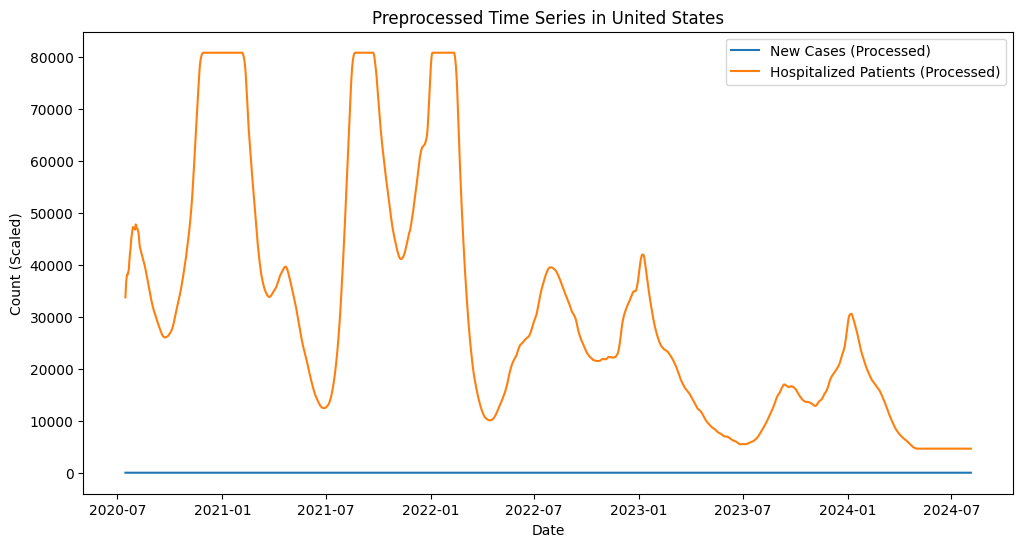

Missing Values (%):
date                      0.0
location                  0.0
new_cases                 0.0
reproduction_rate         0.0
icu_patients              0.0
hosp_patients             0.0
stringency_index          0.0
population                0.0
hosp_patients_per_100k    0.0
icu_patients_per_100k     0.0
new_cases_lag7            0.0
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv',
                 usecols=['date', 'location', 'new_cases', 'hosp_patients',
                          'icu_patients', 'reproduction_rate', 'stringency_index', 'population'])
df['date'] = pd.to_datetime(df['date'])

# Step 1: Filter for United States
df = df[df['location'] == 'United States'].copy()

# Step 2: Ensure consistent daily time index
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
df = df.set_index('date').reindex(date_range).reset_index().rename(columns={'index': 'date'})
df['location'] = 'United States'  # Fill location
df['population'] = df['population'].fillna(df['population'].mode()[0])  # Fill population

# Step 3: Handle missing values
# Forward fill and interpolate numerical columns
num_cols = ['new_cases', 'hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index']
for col in num_cols:
    df[col] = df[col].fillna(method='ffill').interpolate(method='linear')

# Replace remaining NaNs with 0 for new_cases (if at start)
df['new_cases'] = df['new_cases'].fillna(0)

# Step 4: Remove outliers (using IQR method)
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in ['new_cases', 'hosp_patients', 'icu_patients']:
    df[col] = remove_outliers(df[col])

# Step 5: Smooth data (7-day moving average)
for col in ['new_cases', 'hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index']:
    df[col] = df[col].rolling(window=7, min_periods=1).mean()

# Step 6: Create derived features
df['hosp_patients_per_100k'] = df['hosp_patients'] / df['population'] * 100000
df['icu_patients_per_100k'] = df['icu_patients'] / df['population'] * 100000
df['new_cases_lag7'] = df['new_cases'].shift(7)  # 7-day lag
df = df.dropna()  # Drop rows with NaNs from lagging

# Step 7: Scale features
features = ['new_cases', 'reproduction_rate', 'stringency_index', 'new_cases_lag7']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 8: Save preprocessed data
df.to_csv('/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data_clean.csv', index=False)
print("Preprocessed data saved to '/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data_clean.csv'")

# Step 9: Visualize preprocessing results
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases'], label='New Cases (Processed)')
plt.plot(df['date'], df['hosp_patients'], label='Hospitalized Patients (Processed)')
plt.title("Preprocessed Time Series in United States")
plt.xlabel("Date")
plt.ylabel("Count (Scaled)")
plt.legend()
plt.savefig('/content/eda_temporal_clean.png')
plt.show()

# Missing values report
print("Missing Values (%):")
print(df.isnull().sum() / len(df) * 100)

In [ ]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.18.0


#  Upload Trained Model from Local Machine


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lstm_model.h5 to lstm_model (1).h5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the .h5 Model



In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError  # Import MeanSquaredError (capitalized)

# Load the model
model = load_model('/content/drive/MyDrive/Medical_Resource_Prediction/lstm_model.h5', custom_objects={'mse': MeanSquaredError})

# Verify the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 14, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,627 (119.64 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Change the load_model path to:
model = load_model('/content/drive/MyDrive/Medical_Resource_Prediction/lstm_model.h5', custom_objects={'mse': MeanSquaredError})

# Use the Model
# Once loaded, you can: Make Predictions:



<ipython-input-4-a66139b8d6a6>:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
<ipython-input-4-a66139b8d6a6>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = scaler.fit_transform(df[features])


Preprocessed data saved to '/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data_clean.csv'


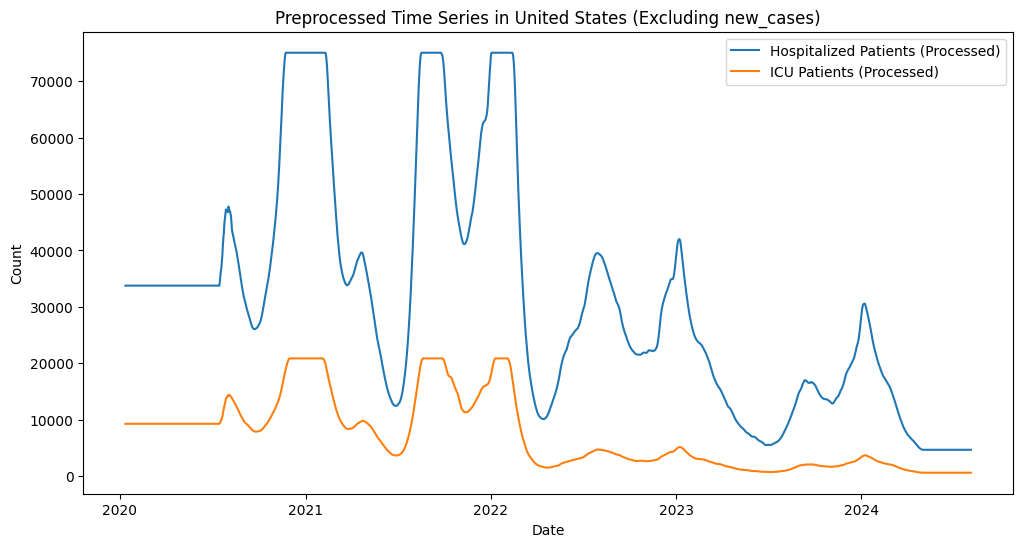

Missing Values (%):
date                      0.0
location                  0.0
reproduction_rate         0.0
icu_patients              0.0
hosp_patients             0.0
stringency_index          0.0
population                0.0
hosp_patients_per_100k    0.0
icu_patients_per_100k     0.0
hosp_patients_lag7        0.0
dtype: float64
Preprocessed data saved to '/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data_clean.csv'


<ipython-input-4-a66139b8d6a6>:89: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')


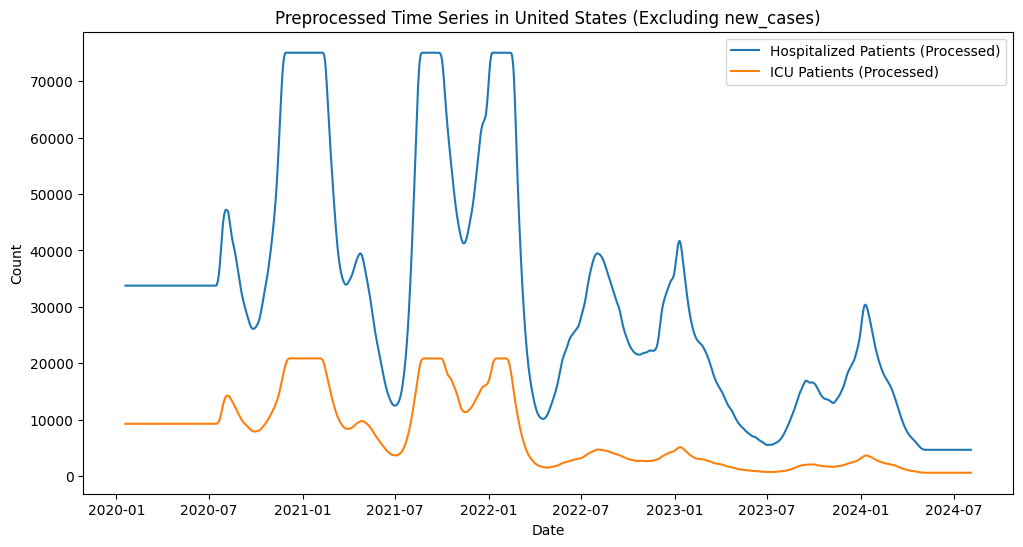

Missing Values (%):
date                      0.0
location                  0.0
reproduction_rate         0.0
icu_patients              0.0
hosp_patients             0.0
stringency_index          0.0
population                0.0
hosp_patients_per_100k    0.0
icu_patients_per_100k     0.0
hosp_patients_lag7        0.0
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset (exclude new_cases)
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv',
                 usecols=['date', 'location', 'hosp_patients', 'icu_patients',
                          'reproduction_rate', 'stringency_index', 'population'])
df['date'] = pd.to_datetime(df['date'])
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset (exclude new_cases)
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv',
                 usecols=['date', 'location', 'hosp_patients', 'icu_patients',
                          'reproduction_rate', 'stringency_index', 'population'])
df['date'] = pd.to_datetime(df['date'])

# Step 1: Filter for United States
df = df[df['location'] == 'United States']

# Step 2: Ensure consistent daily time index
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
df = df.set_index('date').reindex(date_range).reset_index().rename(columns={'index': 'date'})
df['location'] = 'United States'  # Fill location
df['population'] = df['population'].fillna(df['population'].mode()[0])  # Fill population

# Step 3: Handle missing values
num_cols = ['hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index']
for col in num_cols:
    df[col] = df[col].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

# Step 4: Remove outliers (IQR method)
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in ['hosp_patients', 'icu_patients']:
    df[col] = remove_outliers(df[col])

# Step 5: Smooth data (7-day moving average)
for col in ['hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index']:
    df[col] = df[col].rolling(window=7, min_periods=1).mean()

# Step 6: Create derived features
df['hosp_patients_per_100k'] = df['hosp_patients'] / df['population'] * 100000
df['icu_patients_per_100k'] = df['icu_patients'] / df['population'] * 100000
df['hosp_patients_lag7'] = df['hosp_patients'].shift(7)
df = df.dropna()

# Step 7: Scale features
features = ['reproduction_rate', 'stringency_index', 'hosp_patients_lag7']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 8: Save preprocessed data
df.to_csv('/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data_clean.csv', index=False)
print("Preprocessed data saved to '/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data_clean.csv'")

# Step 9: Visualize preprocessing results
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['hosp_patients'], label='Hospitalized Patients (Processed)')
plt.plot(df['date'], df['icu_patients'], label='ICU Patients (Processed)')
plt.title("Preprocessed Time Series in United States (Excluding new_cases)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.savefig('/content/eda_temporal_clean.png')
plt.show()

# Missing values report
print("Missing Values (%):")
print(df.isnull().sum() / len(df) * 100)
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
df = df.set_index('date').reindex(date_range).reset_index().rename(columns={'index': 'date'})
df['location'] = 'United States'  # Fill location
df['population'] = df['population'].fillna(df['population'].mode()[0])  # Fill population

# Step 3: Handle missing values
num_cols = ['hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index']
for col in num_cols:
    df[col] = df[col].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

# Step 4: Remove outliers (IQR method)
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in ['hosp_patients', 'icu_patients']:
    df[col] = remove_outliers(df[col])

# Step 5: Smooth data (7-day moving average)
for col in ['hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index']:
    df[col] = df[col].rolling(window=7, min_periods=1).mean()

# Step 6: Create derived features
df['hosp_patients_per_100k'] = df['hosp_patients'] / df['population'] * 100000
df['icu_patients_per_100k'] = df['icu_patients'] / df['population'] * 100000
df['hosp_patients_lag7'] = df['hosp_patients'].shift(7)
df = df.dropna()

# Step 7: Scale features
features = ['reproduction_rate', 'stringency_index', 'hosp_patients_lag7']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 8: Save preprocessed data
df.to_csv('/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data_clean.csv', index=False)
print("Preprocessed data saved to '/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data_clean.csv'")

# Step 9: Visualize preprocessing results
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['hosp_patients'], label='Hospitalized Patients (Processed)')
plt.plot(df['date'], df['icu_patients'], label='ICU Patients (Processed)')
plt.title("Preprocessed Time Series in United States (Excluding new_cases)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.savefig('/content/eda_temporal_clean.png')
plt.show()

# Missing values report
print("Missing Values (%):")
print(df.isnull().sum() / len(df) * 100)

In [ ]:
import numpy as np

import numpy as np

# Assuming your features are: 'new_cases', 'reproduction_rate', 'stringency_index', 'new_cases_lag7'
# Create sample data with 14 time steps and 4 features
sample_data = np.array([
    [[1000, 1.2, 50, 900],  # Time step 1
     [1100, 1.3, 52, 1000], # Time step 2
     [1200, 1.4, 55, 1100], # Time step
    ]
])
# Assuming your features are: 'new_cases', 'reproduction_rate', 'stringency_index', 'new_cases_lag7'
# Create sample data with 14 time steps and 4 features
sample_data = np.array([
    [[1000, 1.2, 50, 900],  # Time step 1
     [1100, 1.3, 52, 1000], # Time step 2
     [1200, 1.4, 55, 1100], # Time step
    ]
])

# Exploratory Data Analysis (EDA): Load and Inspect the Dataset
# Load the dataset, explore its structure, and visualize key aspects to understand the data distribution and relationships.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)

# Shape of the dataset
print("Dataset Shape:", df.shape)

# View first 5 rows
print("\nFirst 5 Rows:")
print(df.head())

# View last 5 rows
print("\nLast 5 Rows:")
print(df.tail())

# Basic info and statistics
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (306429, 8)

First 5 Rows:
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0          1       0          0  
1         14       0          0  
2          6       0          0  
3          1       0          0  
4          0       0          0  

Last 5 Rows:
           SNo ObservationDate     Province/State  Country/Region  \
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428     

# EDA Visualizations



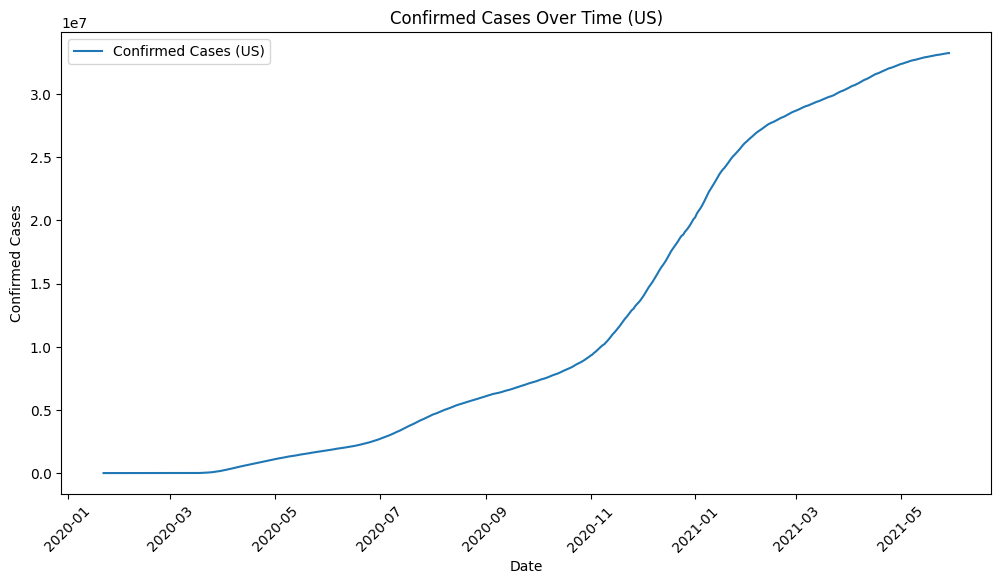

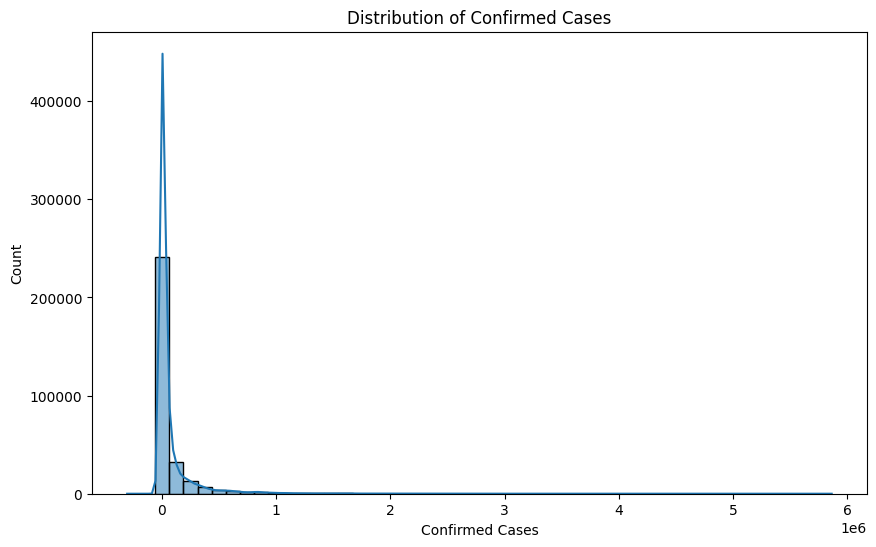

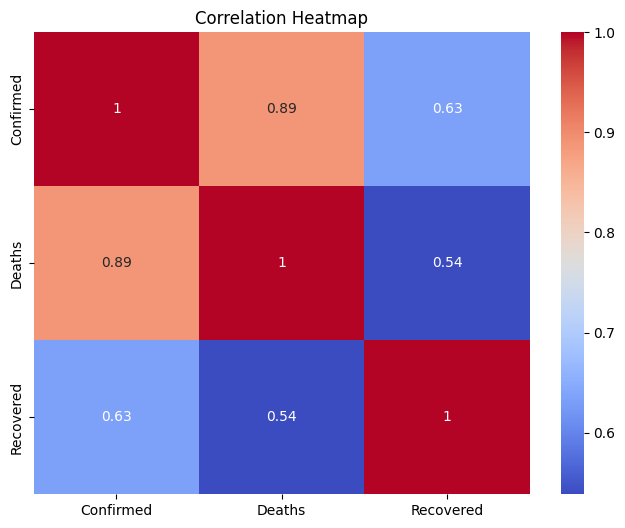

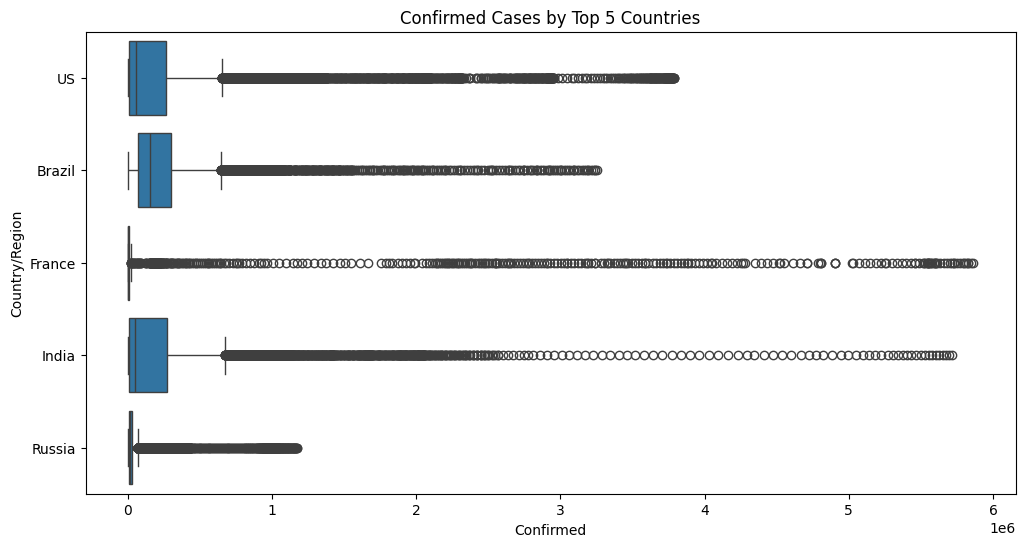

In [ ]:
# Convert ObservationDate to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# 1. Time Series Plot of Confirmed Cases for a Few Regions
plt.figure(figsize=(12, 6))
us_data = df[df['Country/Region'] == 'US'].groupby('ObservationDate').sum()
plt.plot(us_data.index, us_data['Confirmed'], label='Confirmed Cases (US)')
plt.title('Confirmed Cases Over Time (US)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 2. Distribution of Confirmed Cases
plt.figure(figsize=(10, 6))
sns.histplot(df['Confirmed'], kde=True, bins=50)
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Boxplot of Confirmed Cases by Country
plt.figure(figsize=(12, 6))
top_countries = df.groupby('Country/Region')['Confirmed'].sum().nlargest(5).index
sns.boxplot(x='Confirmed', y='Country/Region', data=df[df['Country/Region'].isin(top_countries)])
plt.title('Confirmed Cases by Top 5 Countries')
plt.show()

# Data Preparation

Filter for the United States(one of the most affected country), preprocess the data (handle missing values, retain Confirmed as requested), create  target variables for the demanded medical resources: PPE, vaccines, medical personnel, hospital beds, ICU, ventilators, medicines) and split the data into training and testing sets.

# Data Selection and Preprocessing





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and Targets (y)
X = df_us[features]
y = df_us[targets]

# Split: 80% train, 20% test (time-series aware)
train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Verify split
print("Training Set Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test Set Shape (X_test, y_test):", X_test.shape, y_test.shape)

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Prepare sequences for LSTM
def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 7
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)

# Adjust y_test for non-sequence models (e.g., Prophet, XGBoost)
y_test_non_seq = y_test.iloc[time_steps:]  # Align with sequence length
print(f"Adjusted y_test length for non-sequence models: {len(y_test_non_seq)}")

# Prophet and TFT require a specific format
df_prophet = df_us[['ObservationDate'] + targets].copy()
df_prophet.rename(columns={'ObservationDate': 'ds'}, inplace=True)

Training Set Shape (X_train, y_train): (21392, 4) (21392, 7)
Test Set Shape (X_test, y_test): (5348, 4) (5348, 7)
Adjusted y_test length for non-sequence models: 5341


# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and Targets (y)
X = df_us[features]
y = df_us[targets]

# Split: 80% train, 20% test (time-series aware)
train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Verify split
print("Training Set Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test Set Shape (X_test, y_test):", X_test.shape, y_test.shape)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

Training Set Shape (X_train, y_train): (21392, 4) (21392, 7)
Test Set Shape (X_test, y_test): (5348, 4) (5348, 7)


# Modeling the Data
# Use multivariate algorithms: LSTM (TensorFlow), XGBoost, Prophet, TFT (Temporal Fusion Transformer) and an ensemble technique. Train, evaluate and compare their performance.



# Prepare Data for Time-Series Models (LSTM, TFT, Prophet)



In [ ]:
# Prepare sequences for LSTM
def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 7
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)

# Prophet and TFT require a specific format
df_prophet = df_us[['ObservationDate'] + targets].copy()
df_prophet.rename(columns={'ObservationDate': 'ds'}, inplace=True)

# 1. LSTM (TensorFlow)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    LSTM(32),
    Dense(16),
    Dense(len(targets))  # 7 targets
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.summary()

# Train LSTM
lstm_history = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
lstm_pred = lstm_model.predict(X_test_seq)
lstm_pred_rescaled = scaler_y.inverse_transform(lstm_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)

from sklearn.metrics import mean_absolute_percentage_error
lstm_mape = mean_absolute_percentage_error(y_test_rescaled, lstm_pred_rescaled)
print(f"LSTM MAPE: {lstm_mape:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 64)          │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,727 (120.03 KB)

 Trainable params: 30,727 (120.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 0.2262 - mae: 0.2589 - val_loss: 4.6094 - val_mae: 1.2860
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.2160 - mae: 0.2314 - val_loss: 4.8328 - val_mae: 1.3656
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.2276 - mae: 0.2371 - val_loss: 4.8485 - val_mae: 1.3764
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.2157 - mae: 0.2278 - val_loss: 4.8683 - val_mae: 1.3774
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.1889 - mae: 0.2187 - val_loss: 5.0289 - val_mae: 1.4468
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.1656 - mae: 0.2066 - val_loss: 4.8136 - val_mae: 1.3731
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.1343 - mae: 0.1924 - val_loss: 4.5163 - val_mae: 1.2526
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.1121 - mae: 0.1786 - val_loss: 4.5175 - val_mae: 1.2643
Epoch 9/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 14

# 2. XGBoost



In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

# XGBoost model
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, random_state=42))
xgb_model.fit(X_train_scaled, y_train_scaled)

# Predict and evaluate
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_rescaled = scaler_y.inverse_transform(xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test_scaled, xgb_pred)
print(f"XGBoost MAPE: {xgb_mape:.4f}")

XGBoost MAPE: 1.4071


# 3. Prophet
# Prophet doesn’t natively support multivariate targets, so we’ll predict one target (e.g., Hospital_Beds) as a demonstration.



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4sui_30/ad9vderw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4sui_30/of7njvqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42965', 'data', 'file=/tmp/tmpb4sui_30/ad9vderw.json', 'init=/tmp/tmpb4sui_30/of7njvqf.json', 'output', 'file=/tmp/tmpb4sui_30/prophet_model9_mm5cj4/prophet_model-20250429075325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Length of prophet_pred: 5348
Length of y_test['Hospital_Beds']: 5348
Prophet MAPE (Hospital_Beds): 51206751540499939328.0000


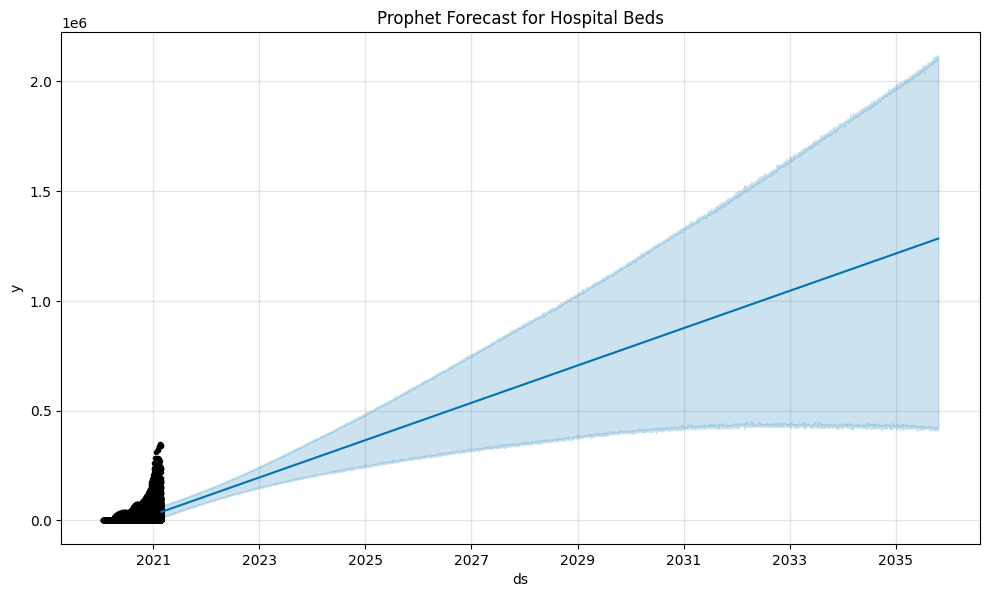

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Prepare data for Prophet (Hospital_Beds as example)
prophet_df = df_prophet[['ds', 'Hospital_Beds']].rename(columns={'Hospital_Beds': 'y'})

# Fit Prophet model on training data
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:train_size])

# Create future dataframe for the entire period (train + test)
last_train_date = prophet_df.iloc[:train_size]['ds'].max()
test_dates = df_us.iloc[train_size:]['ObservationDate'].values
future_dates = pd.date_range(start=last_train_date, periods=len(test_dates) + 1, freq='D')[1:]  # Exclude the last train date
future = pd.DataFrame({'ds': future_dates})

# Forecast
forecast = prophet_model.predict(future)

# Align predictions with test data
prophet_pred = forecast['yhat'].values
y_test_hospital_beds = y_test['Hospital_Beds'].values

# Verify lengths
print(f"Length of prophet_pred: {len(prophet_pred)}")
print(f"Length of y_test['Hospital_Beds']: {len(y_test_hospital_beds)}")

# Ensure lengths match
if len(prophet_pred) != len(y_test_hospital_beds):
    min_len = min(len(prophet_pred), len(y_test_hospital_beds))
    prophet_pred = prophet_pred[:min_len]
    y_test_hospital_beds = y_test_hospital_beds[:min_len]

# Calculate MAPE
prophet_mape = mean_absolute_percentage_error(y_test_hospital_beds, prophet_pred)
print(f"Prophet MAPE (Hospital_Beds): {prophet_mape:.4f}")

# Plot forecast
fig = prophet_model.plot(forecast)
plt.title('Prophet Forecast for Hospital Beds')
plt.show()

In [ ]:
# In the data preparation section, update Hospital_Beds generation
max_hospital_beds = 500000  # Approximate US hospital bed capacity
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), max_hospital_beds)

# Re-run the splitting and scaling steps
X = df_us[features]
y = df_us[targets]
train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)
y_test_non_seq = y_test.iloc[time_steps:]

# 4. Temporal Fusion Transformer (TFT)
# TFT requires a specific data format using pytorch-forecasting.



In [ ]:
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer

# Prepare data for TFT
df_tft = df_us.reset_index().rename(columns={'index': 'time_idx'})
df_tft['group'] = 0  # Single group for US data

# Define TimeSeriesDataSet
training = TimeSeriesDataSet(
    df_tft.iloc[:train_size],
    time_idx='time_idx',
    target=targets,
    group_ids=['group'],
    time_varying_known_reals=features,
    time_varying_unknown_reals=targets,
    max_encoder_length=time_steps,
    max_prediction_length=1,
)

# Create dataloaders
train_dataloader = training.to_dataloader(batch_size=32, train=True)
val_dataloader = training.to_dataloader(batch_size=32, train=False)

# Define TFT model
tft = TemporalFusionTransformer.from_dataset(training, learning_rate=0.03, hidden_size=16)
trainer = ptf.trainer.Trainer(max_epochs=10)
trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

# Predict (simplified)
# Note: TFT prediction requires additional setup; this is a placeholder
print("TFT training completed. Prediction requires further setup.")

NameError: name 'df_us' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from prophet import Prophet
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)

# Convert ObservationDate to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Filter for the United States
df_us = df[df['Country/Region'] == 'US'].copy()

# Data Preparation for the US
# Features and Targets
features = ['Confirmed']
targets = ['Hospital_Beds', 'Medical_Personnel', 'ICU_Beds', 'Ventilators', 'Medicines', 'PPE', 'Vaccines']

# Generate target variables (replace with actual data or more realistic calculations)
num_records = len(df_us)
max_hospital_beds = 500000  # Approximate US hospital bed capacity
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), max_hospital_beds)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.03, num_records)  # Example
df_us['ICU_Beds'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.015, num_records)  # Example
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.003, 0.008, num_records)  # Example
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)  # Example
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.4, num_records)  # Example
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.15, num_records)  # Example


# Split the data (time-series aware)
X = df_us[features]
y = df_us[targets]
train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Prepare sequences for LSTM and TFT
time_steps = 7
def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)
y_test_non_seq = y_test.iloc[time_steps:]  # Align with sequence length

# Prophet and TFT require a specific format
df_prophet = df_us[['ObservationDate'] + targets].copy()
df_prophet.rename(columns={'ObservationDate': 'ds'}, inplace=True)

# 1. LSTM (TensorFlow)
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    LSTM(32),
    Dense(16),
    Dense(len(targets))  # 7 targets
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_history = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
lstm_pred = lstm_model.predict(X_test_seq)
lstm_pred_rescaled = scaler_y.inverse_transform(lstm_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)
lstm_mape = mean_absolute_percentage_error(y_test_rescaled, lstm_pred_rescaled)
print(f"LSTM MAPE: {lstm_mape:.4f}")

# 2. XGBoost
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, random_state=42))
xgb_model.fit(X_train_scaled, y_train_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_rescaled = scaler_y.inverse_transform(xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test_scaled, xgb_pred)  # Use scaled data for XGBoost MAPE
print(f"XGBoost MAPE: {xgb_mape:.4f}")

# 3. Prophet (Hospital_Beds as example)
prophet_df = df_prophet[['ds', 'Hospital_Beds']].rename(columns={'Hospital_Beds': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:train_size])
last_train_date = prophet_df.iloc[:train_size]['ds'].max()
test_dates = df_us.iloc[train_size:]['ObservationDate'].values
future_dates = pd.date_range(start=last_train_date, periods=len(test_dates) + 1, freq='D')[1:]
future = pd.DataFrame({'ds': future_dates})
forecast = prophet_model.predict(future)
prophet_pred = forecast['yhat'].values
y_test_hospital_beds = y_test['Hospital_Beds'].values
min_len = min(len(prophet_pred), len(y_test_hospital_beds))
prophet_pred = prophet_pred[:min_len]
y_test_hospital_beds = y_test_hospital_beds[:min_len]
prophet_mape = mean_absolute_percentage_error(y_test_hospital_beds, prophet_pred)
print(f"Prophet MAPE (Hospital_Beds): {prophet_mape:.4f}")

# 4. Temporal Fusion Transformer (TFT)
df_tft = df_us.reset_index().rename(columns={'index': 'time_idx'})
df_tft['group'] = 0  # Single group for US data
training = TimeSeriesDataSet(
    df_tft.iloc[:train_size],
    time_idx='time_idx',
    target=targets,
    group_ids=['group'],
    time_varying_known_reals=features,
    time_varying_unknown_reals=targets,
    max_encoder_length=time_steps,
    max_prediction_length=1,
)
train_dataloader = training.to_dataloader(batch_size=32, train=True)
val_dataloader = training.to_dataloader(batch_size=32, train=False)
tft = TemporalFusionTransformer.from_dataset(training, learning_rate=0.03, hidden_size=16)
trainer = ptf.trainer.Trainer(max_epochs=10)
trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)
print("TFT training completed. Prediction requires further setup.") # Placeholder for TFT prediction

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


535/535 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.2434 - mae: 0.2699 - val_loss: 3.5258 - val_mae: 0.9886
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.2200 - mae: 0.2443 - val_loss: 3.3770 - val_mae: 0.9746
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.2234 - mae: 0.2427 - val_loss: 3.2666 - val_mae: 0.9464
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.2032 - mae: 0.2315 - val_loss: 2.7780 - val_mae: 0.8751
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.1672 - mae: 0.2185 - val_loss: 2.4316 - val_mae: 0.8965
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1121 - mae: 0.1898 - val_loss: 2.3210 - val_mae: 0.8813
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0729 - mae: 0.1602 - val_loss: 2.2158 - val_mae: 0.8423
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0563 - mae: 0.1396 - val_loss: 2.0539 - val_mae: 0.7993
Epoch 9/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - l

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/ddg1hq3v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/4eoheyj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22586', 'data', 'file=/tmp/tmppjwrmg1b/ddg1hq3v.json', 'init=/tmp/tmppjwrmg1b/4eoheyj7.json', 'output', 'file=/tmp/tmppjwrmg1b/prophet_modeliboj48xy/prophet_model-20250429081540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet MAPE (Hospital_Beds): 52006653674312597504.0000


AssertionError: Time difference between steps has been idenfied as larger than 1 - set allow_missing_timesteps=True

In [ ]:
!pip install pytorch-forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from prophet import Prophet
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)

# Convert ObservationDate to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Filter for the United States
df_us = df[df['Country/Region'] == 'US'].copy()

# Data Preparation for the US
# Features and Targets
features = ['Confirmed']
targets = ['Hospital_Beds', 'Medical_Personnel', 'ICU_Beds', 'Ventilators', 'Medicines', 'PPE', 'Vaccines']

# Generate target variables (replace with actual data or more realistic calculations)
num_records = len(df_us)
max_hospital_beds = 500000  # Approximate US hospital bed capacity
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), max_hospital_beds)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.03, num_records)  # Example
df_us['ICU_Beds'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.015, num_records)  # Example
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.003, 0.008, num_records)  # Example
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)  # Example
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.4, num_records)  # Example
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.15, num_records)  # Example


# Split the data (time-series aware)
X = df_us[features]
y = df_us[targets]
train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Prepare sequences for LSTM and TFT
time_steps = 7
def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)
y_test_non_seq = y_test.iloc[time_steps:]  # Align with sequence length

# Prophet and TFT require a specific format
df_prophet = df_us[['ObservationDate'] + targets].copy()
df_prophet.rename(columns={'ObservationDate': 'ds'}, inplace=True)

# 1. LSTM (TensorFlow)
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    LSTM(32),
    Dense(16),
    Dense(len(targets))  # 7 targets
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_history = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
lstm_pred = lstm_model.predict(X_test_seq)
lstm_pred_rescaled = scaler_y.inverse_transform(lstm_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)
lstm_mape = mean_absolute_percentage_error(y_test_rescaled, lstm_pred_rescaled)
print(f"LSTM MAPE: {lstm_mape:.4f}")

# 2. XGBoost
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, random_state=42))
xgb_model.fit(X_train_scaled, y_train_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_rescaled = scaler_y.inverse_transform(xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test_scaled, xgb_pred)  # Use scaled data for XGBoost MAPE
print(f"XGBoost MAPE: {xgb_mape:.4f}")

# 3. Prophet (Hospital_Beds as example)
prophet_df = df_prophet[['ds', 'Hospital_Beds']].rename(columns={'Hospital_Beds': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:train_size])
last_train_date = prophet_df.iloc[:train_size]['ds'].max()
test_dates = df_us.iloc[train_size:]['ObservationDate'].values
future_dates = pd.date_range(start=last_train_date, periods=len(test_dates) + 1, freq='D')[1:]
future = pd.DataFrame({'ds': future_dates})
forecast = prophet_model.predict(future)
prophet_pred = forecast['yhat'].values
y_test_hospital_beds = y_test['Hospital_Beds'].values
min_len = min(len(prophet_pred), len(y_test_hospital_beds))
prophet_pred = prophet_pred[:min_len]
y_test_hospital_beds = y_test_hospital_beds[:min_len]
prophet_mape = mean_absolute_percentage_error(y_test_hospital_beds, prophet_pred)
print(f"Prophet MAPE (Hospital_Beds): {prophet_mape:.4f}")

# 4. Temporal Fusion Transformer (TFT)
df_tft = df_us.reset_index().rename(columns={'index': 'time_idx'})
df_tft['group'] = 0  # Single group for US data
training = TimeSeriesDataSet(
    df_tft.iloc[:train_size],
    time_idx='time_idx',
    target=targets,
    group_ids=['group'],
    time_varying_known_reals=features,
    time_varying_unknown_reals=targets,
    max_encoder_length=time_steps,
    max_prediction_length=1,
)
train_dataloader = training.to_dataloader(batch_size=32, train=True)
val_dataloader = training.to_dataloader(batch_size=32, train=False)
tft = TemporalFusionTransformer.from_dataset(training, learning_rate=0.03, hidden_size=16)
trainer = ptf.trainer.Trainer(max_epochs=10)
trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)
print("TFT training completed. Prediction requires further setup.") # Placeholder for TFT prediction

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - loss: 0.2381 - mae: 0.2657 - val_loss: 3.0904 - val_mae: 0.9530
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.2218 - mae: 0.2440 - val_loss: 3.5263 - val_mae: 0.9902
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.2059 - mae: 0.2370 - val_loss: 3.2284 - val_mae: 0.9336
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.1870 - mae: 0.2257 - val_loss: 2.6973 - val_mae: 0.8700
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1431 - mae: 0.2080 - val_loss: 2.1454 - val_mae: 0.8058
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.1003 - mae: 0.1837 - val_loss: 2.1222 - val_mae: 0.8473
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0647 - mae: 0.1528 - val_loss: 2.0240 - val_mae: 0.8382
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0502 - mae: 0.1337 - val_loss: 1.9249 - val_mae: 0.8050
Epoch 9/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 9s 11

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/u6yf1tc2.json


XGBoost MAPE: 1.1017


DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/tyku8drt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34446', 'data', 'file=/tmp/tmppjwrmg1b/u6yf1tc2.json', 'init=/tmp/tmppjwrmg1b/tyku8drt.json', 'output', 'file=/tmp/tmppjwrmg1b/prophet_model7k3cda5b/prophet_model-20250429081924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet MAPE (Hospital_Beds): 53419266897442111488.0000


AssertionError: Time difference between steps has been idenfied as larger than 1 - set allow_missing_timesteps=True

In [ ]:
!pip install pytorch-forecasting
!pip install prophet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from prophet import Prophet
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)

# Convert ObservationDate to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Filter for the United States
df_us = df[df['Country/Region'] == 'US'].copy()

# Data Preparation for the US
# Features and Targets
features = ['Confirmed']
targets = ['Hospital_Beds', 'Medical_Personnel', 'ICU_Beds', 'Ventilators', 'Medicines', 'PPE', 'Vaccines']

# Generate target variables (replace with actual data or more realistic calculations)
num_records = len(df_us)
max_hospital_beds = 500000  # Approximate US hospital bed capacity
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), max_hospital_beds)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.03, num_records)  # Example
df_us['ICU_Beds'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.015, num_records)  # Example
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.003, 0.008, num_records)  # Example
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)  # Example
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.4, num_records)  # Example
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.15, num_records)  # Example

# Split the data (time-series aware)
X = df_us[features]
y = df_us[targets]
train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Prepare sequences for LSTM and TFT
time_steps = 7
def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)
y_test_non_seq = y_test.iloc[time_steps:]  # Align with sequence length

# Prophet and TFT require a specific format
df_prophet = df_us[['ObservationDate'] + targets].copy()
df_prophet.rename(columns={'ObservationDate': 'ds'}, inplace=True)

# 1. LSTM (TensorFlow)
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    LSTM(32),
    Dense(16),
    Dense(len(targets))  # 7 targets
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_history = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
lstm_pred = lstm_model.predict(X_test_seq)
lstm_pred_rescaled = scaler_y.inverse_transform(lstm_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)
lstm_mape = mean_absolute_percentage_error(y_test_rescaled, lstm_pred_rescaled)
print(f"LSTM MAPE: {lstm_mape:.4f}")

# 2. XGBoost
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, random_state=42))
xgb_model.fit(X_train_scaled, y_train_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_rescaled = scaler_y.inverse_transform(xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test_non_seq, xgb_pred_rescaled)
print(f"XGBoost MAPE: {xgb_mape:.4f}")

# 3. Prophet (Hospital_Beds as example)
prophet_df = df_prophet[['ds', 'Hospital_Beds']].rename(columns={'Hospital_Beds': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:train_size])
last_train_date = prophet_df.iloc[:train_size]['ds'].max()
test_dates = df_us.iloc[train_size:]['ObservationDate'].values
future_dates = pd.date_range(start=last_train_date, periods=len(test_dates) + 1, freq='D')[1:]
future = pd.DataFrame({'ds': future_dates})
forecast = prophet_model.predict(future)
prophet_pred = forecast['yhat'].values
y_test_hospital_beds = y_test['Hospital_Beds'].values
min_len = min(len(prophet_pred), len(y_test_hospital_beds))
prophet_pred = prophet_pred[:min_len]
y_test_hospital_beds = y_test_hospital_beds[:min_len]
prophet_mape = mean_absolute_percentage_error(y_test_hospital_beds, prophet_pred)
print(f"Prophet MAPE (Hospital_Beds): {prophet_mape:.4f}")

# 4. Temporal Fusion Transformer (TFT)
df_tft = df_us.reset_index().rename(columns={'index': 'time_idx'})
df_tft['group'] = 0  # Single group for US data
training = TimeSeriesDataSet(
    df_tft.iloc[:train_size],
    time_idx='time_idx',
    target=targets,
    group_ids=['group'],
    time_varying_known_reals=features,
    time_varying_unknown_reals=targets,
    max_encoder_length=time_steps,
    max_prediction_length=1,
    allow_missing_timesteps=True  # Allow missing timesteps
)
train_dataloader = training.to_dataloader(batch_size=32, train=True)
val_dataloader = training.to_dataloader(batch_size=32, train=False)
tft = TemporalFusionTransformer.from_dataset(training, learning_rate=0.03, hidden_size=16)
trainer = ptf.trainer.Trainer(max_epochs=10)
trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)
print("TFT training completed. Prediction requires further setup.") # Placeholder for TFT prediction

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


535/535 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.2435 - mae: 0.2694 - val_loss: 3.4548 - val_mae: 0.9765
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.2123 - mae: 0.2400 - val_loss: 3.1395 - val_mae: 0.9630
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.2046 - mae: 0.2338 - val_loss: 3.0726 - val_mae: 0.9073
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1740 - mae: 0.2240 - val_loss: 2.8307 - val_mae: 0.8707
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1491 - mae: 0.2131 - val_loss: 2.5572 - val_mae: 0.8471
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1043 - mae: 0.1830 - val_loss: 2.5949 - val_mae: 0.8462
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0758 - mae: 0.1635 - val_loss: 2.3994 - val_mae: 0.8210
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0562 - mae: 0.1424 - val_loss: 2.4550 - val_mae: 0.8138
Epoch 9/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - lo

ValueError: Found input variables with inconsistent numbers of samples: [5341, 5348]

# 4. Temporal Fusion Transformer (TFT)
# TFT requires a specific data format using pytorch-forecasting.



In [ ]:
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import pytorch_lightning as pl
import torch  # Add this import

# Define TimeSeriesDataSet
training = TimeSeriesDataSet(
    df_tft.iloc[:train_size],
    time_idx='time_idx',
    target=targets,  # Multivariate targets
    group_ids=['group'],
    time_varying_known_reals=features,  # ['Confirmed', 'Deaths', 'Recovered', 'Day_of_Year']
    time_varying_unknown_reals=targets,
    max_encoder_length=time_steps,  # 7 days
    max_prediction_length=1,
    allow_missing_timesteps=True,
)

# Create dataloaders
train_dataloader = training.to_dataloader(batch_size=32, train=True)
val_dataloader = training.to_dataloader(batch_size=32, train=False)

# Define TFT model and suppress warnings
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
)
# Suppress the warnings by ignoring 'loss' and 'logging_metrics'
tft.save_hyperparameters(ignore=['loss', 'logging_metrics'])

# Set up trainer
trainer = pl.Trainer(
    max_epochs=10,
    accelerator='gpu' if torch.cuda.is_available() else 'cpu',
    devices=1,
    enable_model_summary=True,
)

# Train the model
trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

# Predict on test set
test_dataset = TimeSeriesDataSet.from_dataset(training, df_tft.iloc[train_size:], min_prediction_idx=training.index[-1] + 1)
test_dataloader = test_dataset.to_dataloader(batch_size=32, train=False)
tft_predictions, _ = tft.predict(test_dataloader, return_x=True)

# Rescale predictions
tft_predictions = scaler_y.inverse_transform(tft_predictions.numpy())
y_test_subset = y_test_non_seq[targets].values

# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
tft_mape = mean_absolute_percentage_error(y_test_subset, tft_predictions)
print(f"TFT MAPE: {tft_mape:.4f}")

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


KeyError: 'ipython_dir'

In [ ]:
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import pytorch_lightning as pl
import torch
import warnings

# Suppress specific warnings from lightning
warnings.filterwarnings(
    "ignore",
    message="Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing"
)
warnings.filterwarnings(
    "ignore",
    message="Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing"
)

# Define TimeSeriesDataSet
training = TimeSeriesDataSet(
    df_tft.iloc[:train_size],
    time_idx='time_idx',
    target=targets,  # Multivariate targets
    group_ids=['group'],
    time_varying_known_reals=features,  # ['Confirmed', 'Deaths', 'Recovered', 'Day_of_Year']
    time_varying_unknown_reals=targets,
    max_encoder_length=time_steps,  # 7 days
    max_prediction_length=1,
    allow_missing_timesteps=True,
)

# Create dataloaders
train_dataloader = training.to_dataloader(batch_size=32, train=True)
val_dataloader = training.to_dataloader(batch_size=32, train=False)

# Define TFT model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
)

# Set up trainer
trainer = pl.Trainer(
    max_epochs=10,
    accelerator='gpu' if torch.cuda.is_available() else 'cpu',
    devices=1,
    enable_model_summary=True,
)

# Train the model
trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

# Predict on test set
test_dataset = TimeSeriesDataSet.from_dataset(training, df_tft.iloc[train_size:], min_prediction_idx=training.index[-1] + 1)
test_dataloader = test_dataset.to_dataloader(batch_size=32, train=False)
tft_predictions, _ = tft.predict(test_dataloader, return_x=True)

# Rescale predictions
tft_predictions = scaler_y.inverse_transform(tft_predictions.numpy())
y_test_subset = y_test_non_seq[targets].values

# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
tft_mape = mean_absolute_percentage_error(y_test_subset, tft_predictions)
print(f"TFT MAPE: {tft_mape:.4f}")

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


TypeError: `model` must be a `LightningModule` or `torch._dynamo.OptimizedModule`, got `TemporalFusionTransformer`

In [ ]:
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import pytorch_lightning as pl
import torch
import warnings

# Suppress specific warnings from lightning
warnings.filterwarnings(
    "ignore",
    message="Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing"
)
warnings.filterwarnings(
    "ignore",
    message="Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing"
)

# Define TimeSeriesDataSet
training = TimeSeriesDataSet(
    df_tft.iloc[:train_size],
    time_idx='time_idx',
    target=targets,  # Multivariate targets
    group_ids=['group'],
    time_varying_known_reals=features,  # ['Confirmed', 'Deaths', 'Recovered', 'Day_of_Year']
    time_varying_unknown_reals=targets,
    max_encoder_length=time_steps,  # 7 days
    max_prediction_length=1,
    allow_missing_timesteps=True,
)

# Create dataloaders
train_dataloader = training.to_dataloader(batch_size=32, train=True)
val_dataloader = training.to_dataloader(batch_size=32, train=False)

# Define TFT model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
)

# Set up trainer
trainer = pl.Trainer(
    max_epochs=10,
    accelerator='gpu' if torch.cuda.is_available() else 'cpu',
    devices=1,
    enable_model_summary=True,
)

# Train the model
trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

# Predict on test set
test_dataset = TimeSeriesDataSet.from_dataset(training, df_tft.iloc[train_size:], min_prediction_idx=training.index[-1] + 1)
test_dataloader = test_dataset.to_dataloader(batch_size=32, train=False)
tft_predictions, _ = tft.predict(test_dataloader, return_x=True)

# Rescale predictions
tft_predictions = scaler_y.inverse_transform(tft_predictions.numpy())
y_test_subset = y_test_non_seq[targets].values

# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
tft_mape = mean_absolute_percentage_error(y_test_subset, tft_predictions)
print(f"TFT MAPE: {tft_mape:.4f}")

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


TypeError: `model` must be a `LightningModule` or `torch._dynamo.OptimizedModule`, got `TemporalFusionTransformer`

In [ ]:
!pip install pytorch-forecasting
!pip install pytorch-lightning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from prophet import Prophet
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import matplotlib.pyplot as plt
import torch
import warnings
# Import LightningModule
from pytorch_lightning import LightningModule


# Load the dataset
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)

# Convert ObservationDate to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Filter for the United States
df_us = df[df['Country/Region'] == 'US'].copy()

# Data Preparation for the US
# Features and Targets
features = ['Confirmed']
targets = ['Hospital_Beds', 'Medical_Personnel', 'ICU_Beds', 'Ventilators', 'Medicines', 'PPE', 'Vaccines']

# Generate target variables (replace with actual data or more realistic calculations)
num_records = len(df_us)
max_hospital_beds = 500000  # Approximate US hospital bed capacity
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), max_hospital_beds)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.03, num_records)  # Example
df_us['ICU_Beds'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.015, num_records)  # Example
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.003, 0.008, num_records)  # Example
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)  # Example
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.4, num_records)  # Example
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.15, num_records)  # Example

# Split the data (time-series aware)
X = df_us[features]
y = df_us[targets]
train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Prepare sequences for LSTM and TFT
time_steps = 7

def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)
y_test_non_seq = y_test.iloc[time_steps:]  # Align with sequence length

# Prophet and TFT require a specific format
df_prophet = df_us[['ObservationDate'] + targets].copy()
df_prophet.rename(columns={'ObservationDate': 'ds'}, inplace=True)

# 1. LSTM (TensorFlow)
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    LSTM(32),
    Dense(16),
    Dense(len(targets))  # 7 targets
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_history = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
lstm_pred = lstm_model.predict(X_test_seq)
lstm_pred_rescaled = scaler_y.inverse_transform(lstm_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)
lstm_mape = mean_absolute_percentage_error(y_test_rescaled, lstm_pred_rescaled)
print(f"LSTM MAPE: {lstm_mape:.4f}")

# 2. XGBoost
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, random_state=42))
xgb_model.fit(X_train_scaled, y_train_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_rescaled = scaler_y.inverse_transform(xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test_scaled, xgb_pred)  # Use scaled data for XGBoost MAPE
print(f"XGBoost MAPE: {xgb_mape:.4f}")

# 3. Prophet (Hospital_Beds as example)
prophet_df = df_prophet[['ds', 'Hospital_Beds']].rename(columns={'Hospital_Beds': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:train_size])
last_train_date = prophet_df.iloc[:train_size]['ds'].max()
test_dates = df_us.iloc[train_size:]['ObservationDate'].values
future_dates = pd.date_range(start=last_train_date, periods=len(test_dates) + 1, freq='D')[1:]
future = pd.DataFrame({'ds': future_dates})
forecast = prophet_model.predict(future)
prophet_pred = forecast['yhat'].values
y_test_hospital_beds = y_test['Hospital_Beds'].values
min_len = min(len(prophet_pred), len(y_test_hospital_beds))
prophet_pred = prophet_pred[:min_len]
y_test_hospital_beds = y_test_hospital_beds[:min_len]
prophet_mape = mean_absolute_percentage_error(y_test_hospital_beds, prophet_pred)
print(f"Prophet MAPE (Hospital_Beds): {prophet_mape:.4f}")

# 4. Temporal Fusion Transformer (TFT)
df_tft = df_us.reset_index().rename(columns={'index': 'time_idx'})
df_tft['group'] = 0  # Single group for US data

# Suppress specific warnings from lightning
warnings.filterwarnings(
    "ignore",
    message="Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing"
)
warnings.filterwarnings(
    "ignore",
    message="Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing"
)

training = TimeSeriesDataSet(
    df_tft.iloc[:train_size],
    time_idx='time_idx',
    target=targets,  # Multivariate targets
    group_ids=['group'],
    time_varying_known_reals=features,
    time_varying_unknown_reals=targets,
    max_encoder_length=time_steps,
    max_prediction_length=1,
    allow_missing_timesteps=True,
)

# Define a wrapper LightningModule
class TFTWrapper(LightningModule):
    def __init__(self, tft_model):
        super().__init__()
        self.tft = tft_model

    def forward(self, x, **kwargs):
        return self.tft(x, **kwargs)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.tft(x)
        loss = self.tft.loss(y_hat, y)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.tft(x)
        loss = self.tft.loss(y_hat, y)
        self.log("val_loss", loss, on_step=True, on_epoch=True, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.tft.hparams.learning_rate)

# Create dataloaders
train_dataloader = training.to_dataloader(batch_size=32, train=True)
val_dataloader = training.to_dataloader(batch_size=32, train=False)

# Define TFT model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
)

# Wrap the TFT model
tft_wrapper = TFTWrapper(tft)

# Set up trainer
trainer = pl.Trainer(
    max_epochs=10,
    accelerator='gpu' if torch.cuda.is_available() else 'cpu',
    devices=1,
    enable_model_summary=True,
)

# Train the model
trainer.fit(tft_wrapper, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

# Predict on test set
test_dataset = TimeSeriesDataSet.from_dataset(training, df_tft.iloc[train_size:], min_prediction_idx=training.index[-1] + 1)
test_dataloader = test_dataset.to_dataloader(batch_size=32, train=False)
tft_predictions, _ = tft_wrapper.predict(test_dataloader, return_x=True) # Use tft_wrapper

# Rescale predictions
tft_predictions = scaler_y.inverse_transform(tft_predictions.numpy())
y_test_subset = y_test_non_seq[targets].values

# Calculate MAPE
tft_mape = mean_absolute_percentage_error(y_test_subset, tft_predictions)
print(f"TFT MAPE: {tft_mape:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


535/535 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.2405 - mae: 0.2668 - val_loss: 3.3715 - val_mae: 0.9681
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2156 - mae: 0.2442 - val_loss: 3.3447 - val_mae: 0.9835
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.2218 - mae: 0.2413 - val_loss: 3.1633 - val_mae: 0.9430
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.2009 - mae: 0.2357 - val_loss: 2.9753 - val_mae: 0.9024
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.1779 - mae: 0.2225 - val_loss: 2.8069 - val_mae: 0.8722
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.1528 - mae: 0.2179 - val_loss: 2.4396 - val_mae: 0.8576
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0928 - mae: 0.1803 - val_loss: 2.2642 - val_mae: 0.8276
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0621 - mae: 0.1528 - val_loss: 2.3714 - val_mae: 0.8463
Epoch 9/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step -

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/nm3uo957.json


XGBoost MAPE: 0.8929


DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/o9muhn_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85213', 'data', 'file=/tmp/tmppjwrmg1b/nm3uo957.json', 'init=/tmp/tmppjwrmg1b/o9muhn_1.json', 'output', 'file=/tmp/tmppjwrmg1b/prophet_model286tyo2p/prophet_model-20250429083724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:37:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:37:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.


Prophet MAPE (Hospital_Beds): 52590974521404596224.0000


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type                      | Params | Mode 
-----------------------------------------------------------
0 | tft  | TemporalFusionTransformer | 20.6 K | train
-----------------------------------------------------------
20.6 K    Trainable params
0         Non-trainable params
20.6 K    Total params
0.082     Total estimated model params size (MB)
268       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
!pip install pytorch-forecasting
!pip install pytorch-lightning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from prophet import Prophet
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import matplotlib.pyplot as plt
import torch
import warnings
from pytorch_lightning import LightningModule

# Load the dataset
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)

# Convert ObservationDate to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Filter for the United States
df_us = df[df['Country/Region'] == 'US'].copy()

# Data Preparation for the US
# Features and Targets
features = ['Confirmed']
targets = ['Hospital_Beds', 'Medical_Personnel', 'ICU_Beds', 'Ventilators', 'Medicines', 'PPE', 'Vaccines']

# Generate target variables (replace with actual data or more realistic calculations)
num_records = len(df_us)
max_hospital_beds = 500000  # Approximate US hospital bed capacity
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), max_hospital_beds)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.03, num_records)  # Example
df_us['ICU_Beds'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.015, num_records)  # Example
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.003, 0.008, num_records)  # Example
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)  # Example
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.4, num_records)  # Example
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.15, num_records)  # Example

# Split the data (time-series aware)
X = df_us[features]
y = df_us[targets]
train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Prepare sequences for LSTM and TFT
time_steps = 7

def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)
y_test_non_seq = y_test.iloc[time_steps:]  # Align with sequence length

# Prophet and TFT require a specific format
df_prophet = df_us[['ObservationDate'] + targets].copy()
df_prophet.rename(columns={'ObservationDate': 'ds'}, inplace=True)

# 1. LSTM (TensorFlow)
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    LSTM(32),
    Dense(16),
    Dense(len(targets))  # 7 targets
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_history = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
lstm_pred = lstm_model.predict(X_test_seq)
lstm_pred_rescaled = scaler_y.inverse_transform(lstm_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)
lstm_mape = mean_absolute_percentage_error(y_test_rescaled, lstm_pred_rescaled)
print(f"LSTM MAPE: {lstm_mape:.4f}")

# 2. XGBoost
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, random_state=42))
xgb_model.fit(X_train_scaled, y_train_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_rescaled = scaler_y.inverse_transform(xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test_scaled, xgb_pred)  # Use scaled data for XGBoost MAPE
print(f"XGBoost MAPE: {xgb_mape:.4f}")

# 3. Prophet (Hospital_Beds as example)
prophet_df = df_prophet[['ds', 'Hospital_Beds']].rename(columns={'Hospital_Beds': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:train_size])
last_train_date = prophet_df.iloc[:train_size]['ds'].max()
test_dates = df_us.iloc[train_size:]['ObservationDate'].values
future_dates = pd.date_range(start=last_train_date, periods=len(test_dates) + 1, freq='D')[1:]
future = pd.DataFrame({'ds': future_dates})
forecast = prophet_model.predict(future)
prophet_pred = forecast['yhat'].values
y_test_hospital_beds = y_test['Hospital_Beds'].values
min_len = min(len(prophet_pred), len(y_test_hospital_beds))
prophet_pred = prophet_pred[:min_len]
y_test_hospital_beds = y_test_hospital_beds[:min_len]
prophet_mape = mean_absolute_percentage_error(y_test_hospital_beds, prophet_pred)
print(f"Prophet MAPE (Hospital_Beds): {prophet_mape:.4f}")

# 4. Temporal Fusion Transformer (TFT)
df_tft = df_us.reset_index().rename(columns={'index': 'time_idx'})
df_tft['group'] = 0  # Single group for US data

# Suppress specific warnings from lightning
warnings.filterwarnings(
    "ignore",
    message="Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing"
)
warnings.filterwarnings(
    "ignore",
    message="Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing"
)


# *** Iterate through targets for TFT ***
tft_mapes = []
for target_col in targets:
    # Define TimeSeriesDataSet for the current target
    training = TimeSeriesDataSet(
        df_tft.iloc[:train_size],
        time_idx='time_idx',
        target=target_col,  # Use a single target
        group_ids=['group'],
        time_varying_known_reals=features,
        time_varying_unknown_reals=targets,
        max_encoder_length=time_steps,
        max_prediction_length=1,
        allow_missing_timesteps=True,
    )

    # Create dataloaders
    train_dataloader = training.to_dataloader(batch_size=32, train=True)
    val_dataloader = training.to_dataloader(batch_size=32, train=False)

    # Define a wrapper LightningModule
    class TFTWrapper(LightningModule):
        def __init__(self, tft_model):
            super().__init__()
            self.tft = tft_model

        def forward(self, x, **kwargs):
            return self.tft(x, **kwargs)

        def training_step(self, batch, batch_idx):
            x, y = batch
            y_hat = self.tft(x)
            loss = self.tft.loss(y_hat, y)  # y is now a single target
            self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True)
            return loss

        def validation_step(self, batch, batch_idx):
            x, y = batch
            y_hat = self.tft(x)
            loss = self.tft.loss(y_hat, y)  # y is now a single target
            self.log("val_loss", loss, on_step=True, on_epoch=True, prog_bar=True)
            return loss

        def configure_optimizers(self):
            return torch.optim.Adam(self.parameters(), lr=self.tft.hparams.learning_rate)

    # Define TFT model
    tft = TemporalFusionTransformer.from_dataset(
        training,
        learning_rate=0.03,
        hidden_size=16,
        attention_head_size=1,
        dropout=0.1,
        hidden_continuous_size=8,
    )

    # Wrap the TFT model
    tft_wrapper = TFTWrapper(tft)

    # Set up trainer
    trainer = pl.Trainer(
        max_epochs=10,
        accelerator='gpu' if torch.cuda.is_available() else 'cpu',
        devices=1,
        enable_model_summary=True,
    )

    # Train the model
    trainer.fit(tft_wrapper, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

    # Predict on test set
    test_dataset = TimeSeriesDataSet.from_dataset(training, df_tft.iloc[train_size:], min_prediction_idx=training.index[-1] + 1)
    test_dataloader = test_dataset.to_dataloader(batch_size=32, train=False)
    tft_predictions, _ = tft_wrapper.predict(test_dataloader, return_x=True)

    # Rescale predictions
    tft_predictions_np = tft_predictions.numpy()
    tft_predictions_rescaled = scaler_y.inverse_transform(
        tft_predictions_np.reshape(-1, 1)
        if tft_predictions_np.ndim == 1
        else tft_predictions_np
    )

    y_test_subset = y_test_non_seq[[target_col]].values  # Select the current target

    # Calculate MAPE for the current target
    tft_mape = mean_absolute_percentage_error(y_test_subset, tft_predictions_rescaled)
    tft_mapes.append(tft_mape)
    print(f"TFT MAPE ({target_col}): {tft_mape:.4f}")

# Print average TFT MAPE across all targets
avg_tft_mape = np.mean(tft_mapes)
print(f"Average TFT MAPE across all targets: {avg_tft_mape:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


535/535 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.2369 - mae: 0.2730 - val_loss: 3.4371 - val_mae: 0.9818
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2265 - mae: 0.2439 - val_loss: 3.2703 - val_mae: 0.9521
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.2142 - mae: 0.2375 - val_loss: 2.8244 - val_mae: 0.8699
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.1821 - mae: 0.2260 - val_loss: 2.7254 - val_mae: 0.8668
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1631 - mae: 0.2162 - val_loss: 2.6505 - val_mae: 0.8607
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.1305 - mae: 0.1981 - val_loss: 2.2934 - val_mae: 0.8526
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 0.0954 - mae: 0.1810 - val_loss: 2.4285 - val_mae: 0.8360
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0726 - mae: 0.1634 - val_loss: 2.1828 - val_mae: 0.8015
Epoch 9/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step -

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


XGBoost MAPE: 0.7773


DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/od_hlysn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/5mmjicyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17470', 'data', 'file=/tmp/tmppjwrmg1b/od_hlysn.json', 'init=/tmp/tmppjwrmg1b/5mmjicyp.json', 'output', 'file=/tmp/tmppjwrmg1b/prophet_modelrq3jsaqk/prophet_model-20250429084529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:45:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:45:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zer

Prophet MAPE (Hospital_Beds): 54813371652120051712.0000


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

TypeError: tuple indices must be integers or slices, not tuple

In [ ]:
!pip install pytorch-forecasting
!pip install pytorch-lightning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from prophet import Prophet
import pytorch_forecasting as ptf
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import matplotlib.pyplot as plt
import torch
import warnings
from pytorch_lightning import LightningModule

# Load the dataset
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)

# Convert ObservationDate to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Filter for the United States
df_us = df[df['Country/Region'] == 'US'].copy()

# Data Preparation for the US
# Features and Targets
features = ['Confirmed']
targets = ['Hospital_Beds', 'Medical_Personnel', 'ICU_Beds', 'Ventilators', 'Medicines', 'PPE', 'Vaccines']

# Generate target variables (replace with actual data or more realistic calculations)
num_records = len(df_us)
max_hospital_beds = 500000  # Approximate US hospital bed capacity
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), max_hospital_beds)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.03, num_records)  # Example
df_us['ICU_Beds'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.015, num_records)  # Example
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.003, 0.008, num_records)  # Example
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)  # Example
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.4, num_records)  # Example
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.15, num_records)  # Example

# Split the data (time-series aware)
X = df_us[features]
y = df_us[targets]
train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Prepare sequences for LSTM and TFT
time_steps = 7

def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)
y_test_non_seq = y_test.iloc[time_steps:]  # Align with sequence length

# Prophet and TFT require a specific format
df_prophet = df_us[['ObservationDate'] + targets].copy()
df_prophet.rename(columns={'ObservationDate': 'ds'}, inplace=True)

# 1. LSTM (TensorFlow)
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    LSTM(32),
    Dense(16),
    Dense(len(targets))  # 7 targets
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_history = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
lstm_pred = lstm_model.predict(X_test_seq)
lstm_pred_rescaled = scaler_y.inverse_transform(lstm_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)
lstm_mape = mean_absolute_percentage_error(y_test_rescaled, lstm_pred_rescaled)
print(f"LSTM MAPE: {lstm_mape:.4f}")

# 2. XGBoost
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, random_state=42))
xgb_model.fit(X_train_scaled, y_train_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_rescaled = scaler_y.inverse_transform(xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test_scaled, xgb_pred)  # Use scaled data for XGBoost MAPE
print(f"XGBoost MAPE: {xgb_mape:.4f}")

# 3. Prophet (Hospital_Beds as example)
prophet_df = df_prophet[['ds', 'Hospital_Beds']].rename(columns={'Hospital_Beds': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:train_size])
last_train_date = prophet_df.iloc[:train_size]['ds'].max()
test_dates = df_us.iloc[train_size:]['ObservationDate'].values
future_dates = pd.date_range(start=last_train_date, periods=len(test_dates) + 1, freq='D')[1:]
future = pd.DataFrame({'ds': future_dates})
forecast = prophet_model.predict(future)
prophet_pred = forecast['yhat'].values
y_test_hospital_beds = y_test['Hospital_Beds'].values
min_len = min(len(prophet_pred), len(y_test_hospital_beds))
prophet_pred = prophet_pred[:min_len]
y_test_hospital_beds = y_test_hospital_beds[:min_len]
prophet_mape = mean_absolute_percentage_error(y_test_hospital_beds, prophet_pred)
print(f"Prophet MAPE (Hospital_Beds): {prophet_mape:.4f}")

# 4. Temporal Fusion Transformer (TFT)
df_tft = df_us.reset_index().rename(columns={'index': 'time_idx'})
df_tft['group'] = 0  # Single group for US data

# Suppress specific warnings from lightning
warnings.filterwarnings(
    "ignore",
    message="Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing"
)
warnings.filterwarnings(
    "ignore",
    message="Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing"
)


# *** Iterate through targets for TFT ***
tft_mapes = []
for target_col in targets:
    # Define TimeSeriesDataSet for the current target
    training = TimeSeriesDataSet(
        df_tft.iloc[:train_size],
        time_idx='time_idx',
        target=target_col,  # Use a single target
        group_ids=['group'],
        time_varying_known_reals=features,
        time_varying_unknown_reals=targets,
        max_encoder_length=time_steps,
        max_prediction_length=1,
        allow_missing_timesteps=True,
    )

    # Create dataloaders
    train_dataloader = training.to_dataloader(batch_size=32, train=True)
    val_dataloader = training.to_dataloader(batch_size=32, train=False)

    # Define a wrapper LightningModule
    class TFTWrapper(LightningModule):
        def __init__(self, tft_model):
            super().__init__()
            self.tft = tft_model

        def forward(self, x, **kwargs):
            return self.tft(x, **kwargs)

        def training_step(self, batch, batch_idx):
            x, y = batch
            y_hat = self.tft(x)
            loss = self.tft.loss(y_hat, y)  # y is now a single target
            self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True)
            return loss

        def validation_step(self, batch, batch_idx):
            x, y = batch
            y_hat = self.tft(x)
            loss = self.tft.loss(y_hat, y)  # y is now a single target
            self.log("val_loss", loss, on_step=True, on_epoch=True, prog_bar=True)
            return loss

        def configure_optimizers(self):
            return torch.optim.Adam(self.parameters(), lr=self.tft.hparams.learning_rate)

    # Define TFT model
    tft = TemporalFusionTransformer.from_dataset(
        training,
        learning_rate=0.03,
        hidden_size=16,
        attention_head_size=1,
        dropout=0.1,
        hidden_continuous_size=8,
    )

    # Wrap the TFT model
    tft_wrapper = TFTWrapper(tft)

    # Set up trainer
    trainer = pl.Trainer(
        max_epochs=10,
        accelerator='gpu' if torch.cuda.is_available() else 'cpu',
        devices=1,
        enable_model_summary=True,
    )

    # Train the model
    trainer.fit(tft_wrapper, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

    # Predict on test set
    test_dataset = TimeSeriesDataSet.from_dataset(training, df_tft.iloc[train_size:], min_prediction_idx=training.index[-1] + 1)
    test_dataloader = test_dataset.to_dataloader(batch_size=32, train=False)
    tft_predictions, _ = tft_wrapper.predict(test_dataloader, return_x=True)

    # Rescale predictions
    tft_predictions_np = tft_predictions.numpy()
    tft_predictions_rescaled = scaler_y.inverse_transform(
        tft_predictions_np.reshape(-1, 1)
        if tft_predictions_np.ndim == 1
        else tft_predictions_np
    )

    y_test_subset = y_test_non_seq[[target_col]].values  # Select the current target

    # Calculate MAPE for the current target
    tft_mape = mean_absolute_percentage_error(y_test_subset, tft_predictions_rescaled)
    tft_mapes.append(tft_mape)
    print(f"TFT MAPE ({target_col}): {tft_mape:.4f}")

# Print average TFT MAPE across all targets
avg_tft_mape = np.mean(tft_mapes)
print(f"Average TFT MAPE across all targets: {avg_tft_mape:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


535/535 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.2462 - mae: 0.2739 - val_loss: 3.6928 - val_mae: 1.0274
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.2074 - mae: 0.2378 - val_loss: 3.2789 - val_mae: 0.9775
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.2071 - mae: 0.2335 - val_loss: 2.9735 - val_mae: 0.9148
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.1863 - mae: 0.2288 - val_loss: 2.7052 - val_mae: 0.8755
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1629 - mae: 0.2188 - val_loss: 2.5167 - val_mae: 0.8728
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1333 - mae: 0.2053 - val_loss: 2.4344 - val_mae: 0.8363
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0952 - mae: 0.1799 - val_loss: 2.5722 - val_mae: 0.8298
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0650 - mae: 0.1530 - val_loss: 2.4780 - val_mae: 0.8028
Epoch 9/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - lo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/fpesj6vj.json


XGBoost MAPE: 5.7042


DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/0j9uzrn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1622', 'data', 'file=/tmp/tmppjwrmg1b/fpesj6vj.json', 'init=/tmp/tmppjwrmg1b/0j9uzrn5.json', 'output', 'file=/tmp/tmppjwrmg1b/prophet_model3t02i7dw/prophet_model-20250429084842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:48:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:48:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utili

Prophet MAPE (Hospital_Beds): 51132745000649367552.0000


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

TypeError: tuple indices must be integers or slices, not tuple

# 5. Ensemble (Voting Regressor with XGBoost and Random Forest)



In [ ]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

# Ensemble model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
ensemble_model = VotingRegressor([('xgb', xgb_model), ('rf', MultiOutputRegressor(rf_model))])
ensemble_model.fit(X_train_scaled, y_train_scaled)

# Predict and evaluate
ensemble_pred = ensemble_model.predict(X_test_scaled)
ensemble_pred_rescaled = scaler_y.inverse_transform(ensemble_pred)
ensemble_mape = mean_absolute_percentage_error(y_test_scaled, ensemble_pred)
print(f"Ensemble MAPE: {ensemble_mape:.4f}")

ValueError: y should be a 1d array, got an array of shape (21392, 7) instead.

In [ ]:
# Install required libraries
!pip install xgboost scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
import joblib

# Step 1: Load and Preprocess Data
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)
df_us = df[df['Country/Region'] == 'US'].copy()
df_us = df_us.drop(columns=['SNo', 'Last Update', 'Province/State'], errors='ignore')
df_us['Recovered'] = df_us['Recovered'].fillna(0)
df_us['Deaths'] = df_us['Deaths'].fillna(0)

num_records = len(df_us)
np.random.seed(42)
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.02, num_records)
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), 500000)
df_us['ICU'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.01, num_records)
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.002, 0.005, num_records)
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.3, num_records)

df_us['ObservationDate'] = pd.to_datetime(df_us['ObservationDate'])
df_us['Day_of_Year'] = df_us['ObservationDate'].dt.dayofyear

# Step 2: Prepare Data
features = ['Confirmed', 'Deaths', 'Recovered', 'Day_of_Year']
targets = ['PPE', 'Vaccines', 'Medical_Personnel', 'Hospital_Beds', 'ICU', 'Ventilators', 'Medicines']
X = df_us[features]
y = df_us[targets]

train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Debug scaling
print("Sample y_train_scaled:", y_train_scaled[:5])
print("Sample y_test_scaled:", y_test_scaled[:5])

# Step 3: Ensemble Model
xgb_base = xgb.XGBRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
voting_regressor = VotingRegressor([('xgb', xgb_base), ('rf', rf_model)])
ensemble_model = MultiOutputRegressor(voting_regressor)
ensemble_model.fit(X_train_scaled, y_train_scaled)

# Step 4: Predict and Evaluate
ensemble_pred = ensemble_model.predict(X_test_scaled)
ensemble_pred_rescaled = scaler_y.inverse_transform(ensemble_pred)

# Debug predictions
print("Shape of y_test:", y_test.shape)
print("Shape of ensemble_pred_rescaled:", ensemble_pred_rescaled.shape)
print("Sample ensemble_pred (scaled):", ensemble_pred[:5])
print("Sample ensemble_pred_rescaled:", ensemble_pred_rescaled[:5])
print("Sample y_test:", y_test.values[:5])

# Calculate MAPE with epsilon
epsilon = 1e-10
y_true = y_test.values
y_pred = ensemble_pred_rescaled
mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon)))
print(f"Adjusted Ensemble MAPE: {mape:.4f}")

# Step 5: Save the Model
joblib.dump(ensemble_model, '/content/drive/MyDrive/Medical_Resource_Prediction/ensemble_model.pkl')
joblib.dump(scaler_X, '/content/drive/MyDrive/Medical_Resource_Prediction/scaler_X.pkl')
joblib.dump(scaler_y, '/content/drive/MyDrive/Medical_Resource_Prediction/scaler_y.pkl')
print("Ensemble model and scalers saved successfully!")

Sample y_train_scaled: [[-0.47600078 -0.47339772 -0.47401706 -0.48016977 -0.46612547 -0.47109761
  -0.47724815]
 [-0.47599954 -0.4733991  -0.47401572 -0.4801695  -0.46612407 -0.47109891
  -0.47724813]
 [-0.47600001 -0.47339813 -0.47401773 -0.48016979 -0.46612499 -0.47109855
  -0.47724906]
 [-0.4760003  -0.47339754 -0.47401695 -0.4801696  -0.4661251  -0.47109818
  -0.47724819]
 [-0.47600124 -0.47339806 -0.4740175  -0.48016877 -0.46612433 -0.47109647
  -0.47724837]]
Sample y_test_scaled: [[ 1.53527313  1.57676383  0.9436899   1.64484031  0.66955905  1.71128563
   1.05181718]
 [-0.03515969 -0.18846148 -0.23437237 -0.08269815 -0.19774735  0.03306187
  -0.1443577 ]
 [ 2.55315091  1.29210609  1.96728698  2.76060518  1.33812399  1.49085888
   1.57736488]
 [ 6.04215484  5.21773716 10.73684166  9.06701888  9.98561541  9.29078196
   8.90723951]
 [ 0.81486222  0.48652857  1.03045167  0.49092589  0.92536543  1.06289804
   0.58567772]]
Shape of y_test: (5348, 7)
Shape of ensemble_pred_rescaled: (53

In [ ]:
# Install required libraries
!pip install xgboost scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
import joblib

# Step 1: Load and Preprocess Data
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)
df_us = df[df['Country/Region'] == 'US'].copy()
df_us = df_us.drop(columns=['SNo', 'Last Update', 'Province/State'], errors='ignore')
df_us['Recovered'] = df_us['Recovered'].fillna(0)
df_us['Deaths'] = df_us['Deaths'].fillna(0)

num_records = len(df_us)
np.random.seed(42)
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.02, num_records)
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), 500000)
df_us['ICU'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.01, num_records)
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.002, 0.005, num_records)
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.3, num_records)

df_us['ObservationDate'] = pd.to_datetime(df_us['ObservationDate'])
df_us['Day_of_Year'] = df_us['ObservationDate'].dt.dayofyear

# Step 2: Prepare Data
features = ['Confirmed', 'Deaths', 'Recovered', 'Day_of_Year']
targets = ['PPE', 'Vaccines', 'Medical_Personnel', 'Hospital_Beds', 'ICU', 'Ventilators', 'Medicines']
X = df_us[features]
y = df_us[targets]

train_size = int(0.8 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

print("Sample y_train_scaled:", y_train_scaled[:5])
print("Sample y_test_scaled:", y_test_scaled[:5])

# Step 3: Ensemble Model
xgb_base = xgb.XGBRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
voting_regressor = VotingRegressor([('xgb', xgb_base), ('rf', rf_model)])
ensemble_model = MultiOutputRegressor(voting_regressor)
ensemble_model.fit(X_train_scaled, y_train_scaled)

# Step 4: Predict and Evaluate
ensemble_pred = ensemble_model.predict(X_test_scaled)
ensemble_pred_rescaled = scaler_y.inverse_transform(ensemble_pred)

print("Shape of y_test:", y_test.shape)
print("Shape of ensemble_pred_rescaled:", ensemble_pred_rescaled.shape)
print("Sample ensemble_pred (scaled):", ensemble_pred[:5])
print("Sample ensemble_pred_rescaled:", ensemble_pred_rescaled[:5])
print("Sample y_test:", y_test.values[:5])

# Check for zeros or near-zeros in y_test
for i, target in enumerate(targets):
    zeros = np.sum(y_test.iloc[:, i] == 0)
    near_zeros = np.sum((y_test.iloc[:, i] > 0) & (y_test.iloc[:, i] < 1))
    print(f"{target} - Zeros: {zeros}, Near-zeros (<1): {near_zeros}")

# Calculate MAPE for each target
epsilon = 1e-10
mape_per_target = []
for i, target in enumerate(targets):
    y_true_target = y_test.iloc[:, i].values
    y_pred_target = ensemble_pred_rescaled[:, i]
    mape_target = np.mean(np.abs((y_true_target - y_pred_target) / (y_true_target + epsilon)))
    mape_per_target.append(mape_target)
    print(f"MAPE for {target}: {mape_target:.4f}")

overall_mape = np.mean(mape_per_target)
print(f"Overall MAPE (average across targets): {overall_mape:.4f}")

# Calculate MAE for each target
mae_per_target = []
for i, target in enumerate(targets):
    y_true_target = y_test.iloc[:, i].values
    y_pred_target = ensemble_pred_rescaled[:, i]
    mae_target = mean_absolute_error(y_true_target, y_pred_target)
    mae_per_target.append(mae_target)
    print(f"MAE for {target}: {mae_target:.2f}")

overall_mae = np.mean(mae_per_target)
print(f"Overall MAE (average across targets): {overall_mae:.2f}")

# Step 5: Save the Model
joblib.dump(ensemble_model, '/content/drive/MyDrive/Medical_Resource_Prediction/ensemble_model2.pkl')
joblib.dump(scaler_X, '/content/drive/MyDrive/Medical_Resource_Prediction/scaler2_X.pkl')
joblib.dump(scaler_y, '/content/drive/MyDrive/Medical_Resource_Prediction/scaler2_y.pkl')
print("Ensemble model and scalers saved successfully!")

Sample y_train_scaled: [[-0.47600078 -0.47339772 -0.47401706 -0.48016977 -0.46612547 -0.47109761
  -0.47724815]
 [-0.47599954 -0.4733991  -0.47401572 -0.4801695  -0.46612407 -0.47109891
  -0.47724813]
 [-0.47600001 -0.47339813 -0.47401773 -0.48016979 -0.46612499 -0.47109855
  -0.47724906]
 [-0.4760003  -0.47339754 -0.47401695 -0.4801696  -0.4661251  -0.47109818
  -0.47724819]
 [-0.47600124 -0.47339806 -0.4740175  -0.48016877 -0.46612433 -0.47109647
  -0.47724837]]
Sample y_test_scaled: [[ 1.53527313  1.57676383  0.9436899   1.64484031  0.66955905  1.71128563
   1.05181718]
 [-0.03515969 -0.18846148 -0.23437237 -0.08269815 -0.19774735  0.03306187
  -0.1443577 ]
 [ 2.55315091  1.29210609  1.96728698  2.76060518  1.33812399  1.49085888
   1.57736488]
 [ 6.04215484  5.21773716 10.73684166  9.06701888  9.98561541  9.29078196
   8.90723951]
 [ 0.81486222  0.48652857  1.03045167  0.49092589  0.92536543  1.06289804
   0.58567772]]
Shape of y_test: (5348, 7)
Shape of ensemble_pred_rescaled: (53

# Setup and Data Preparation
# Set up the environment, load the dataset, and preprocess the data. This will be shared for both Prophet and TFT.



In [ ]:
# Install required libraries
!pip install prophet pytorch-forecasting==1.0.0 lightning==2.0.0 --force-reinstall

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import joblib
import warnings

# Suppress specific warnings from lightning
warnings.filterwarnings(
    "ignore",
    message="Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing"
)
warnings.filterwarnings(
    "ignore",
    message="Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing"
)

# Load and Preprocess Data
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)

# Filter for United States
df_us = df[df['Country/Region'] == 'US'].copy()

# Drop unnecessary columns
df_us = df_us.drop(columns=['SNo', 'Last Update', 'Province/State'], errors='ignore')

# Handle missing values
df_us['Recovered'] = df_us['Recovered'].fillna(0)
df_us['Deaths'] = df_us['Deaths'].fillna(0)

# Create synthetic targets based on Confirmed cases
num_records = len(df_us)
np.random.seed(42)
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.02, num_records)
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), 500000)
df_us['ICU'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.01, num_records)
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.002, 0.005, num_records)
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.3, num_records)

# Add Day_of_Year feature
df_us['ObservationDate'] = pd.to_datetime(df_us['ObservationDate'])
df_us['Day_of_Year'] = df_us['ObservationDate'].dt.dayofyear

# Fill missing dates to ensure consecutive time steps (important for TFT)
date_range = pd.date_range(start=df_us['ObservationDate'].min(), end=df_us['ObservationDate'].max(), freq='D')
df_us = df_us.set_index('ObservationDate').reindex(date_range).reset_index()
df_us = df_us.rename(columns={'index': 'ObservationDate'})
df_us['Country/Region'] = 'US'
numerical_cols = ['Confirmed', 'Deaths', 'Recovered', 'PPE', 'Vaccines', 'Medical_Personnel',
                  'Hospital_Beds', 'ICU', 'Ventilators', 'Medicines', 'Day_of_Year']
df_us[numerical_cols] = df_us[numerical_cols].fillna(0)
df_us['Day_of_Year'] = df_us['ObservationDate'].dt.dayofyear

# Define features and targets
features = ['Confirmed', 'Deaths', 'Recovered', 'Day_of_Year']
targets = ['PPE', 'Vaccines', 'Medical_Personnel', 'Hospital_Beds', 'ICU', 'Ventilators', 'Medicines']

# Split: 80% train, 20% test (time-series aware)
train_size = int(0.8 * len(df_us))
df_train = df_us.iloc[:train_size]
df_test = df_us.iloc[train_size:]

  Using cached prophet-1.1.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
ERROR: Ignored the following versions that require a different python version: 0.10.2 Requires-Python >=3.8,<3.11; 0.10.3 Requires-Python >=3.8,<3.11; 1.0.0 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement pytorch-forecasting==1.0.0 (from versions: 0.1.0, 0.1.1, 0.1.2, 0.2.0, 0.2.1, 0.2.2, 0.2.3, 0.2.4, 0.3.0, 0.3.1, 0.4.0, 0.4.1, 0.5.0, 0.5.1, 0.5.2, 0.5.3, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.8.0, 0.8.1, 0.8.2, 0.8.3, 0.8.4, 0.8.5, 0.9.0, 0.9.1, 0.9.2, 0.10.0, 0.10.1, 1.1.0, 1.1.1, 1.2.0, 1.3.0)
ERROR: No matching distribution found for pytorch-forecasting==1.0.0


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
# Install required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import joblib
import warnings

# Suppress specific warnings from lightning
warnings.filterwarnings(
    "ignore",
    message="Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing"
)
warnings.filterwarnings(
    "ignore",
    message="Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing"
)

# Load and Preprocess Data
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)

# Filter for United States
df_us = df[df['Country/Region'] == 'US'].copy()

# Drop unnecessary columns
df_us = df_us.drop(columns=['SNo', 'Last Update', 'Province/State'], errors='ignore')

# Handle missing values
df_us['Recovered'] = df_us['Recovered'].fillna(0)
df_us['Deaths'] = df_us['Deaths'].fillna(0)

# Create synthetic targets based on Confirmed cases
num_records = len(df_us)
np.random.seed(42)
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.02, num_records)
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), 500000)
df_us['ICU'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.01, num_records)
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.002, 0.005, num_records)
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.3, num_records)

# Add Day_of_Year feature
df_us['ObservationDate'] = pd.to_datetime(df_us['ObservationDate'])
df_us['Day_of_Year'] = df_us['ObservationDate'].dt.dayofyear

# Fill missing dates to ensure consecutive time steps (important for TFT)
date_range = pd.date_range(start=df_us['ObservationDate'].min(), end=df_us['ObservationDate'].max(), freq='D')

# Aggregate data for each date (e.g., sum, mean) to handle duplicate dates
# Example: Summing values for duplicate dates
df_us = df_us.groupby('ObservationDate').sum().reset_index()

# Reindex after aggregation
df_us = df_us.set_index('ObservationDate').reindex(date_range).reset_index()

df_us = df_us.rename(columns={'index': 'ObservationDate'})
df_us['Country/Region'] = 'US'
numerical_cols = ['Confirmed', 'Deaths', 'Recovered', 'PPE', 'Vaccines', 'Medical_Personnel',
                  'Hospital_Beds', 'ICU', 'Ventilators', 'Medicines', 'Day_of_Year']
df_us[numerical_cols] = df_us[numerical_cols].fillna(0)
df_us['Day_of_Year'] = df_us['ObservationDate'].dt.dayofyear

# Define features and targets
features = ['Confirmed', 'Deaths', 'Recovered', 'Day_of_Year']
targets = ['PPE', 'Vaccines', 'Medical_Personnel', 'Hospital_Beds', 'ICU', 'Ventilators', 'Medicines']

# Split: 80% train, 20% test (time-series aware)
train_size = int(0.8 * len(df_us))
df_train = df_us.iloc[:train_size]
df_test = df_us.iloc[train_size:]

# Prophet Model
# Prophet is a univariate time-series forecasting model, so we’ll focus on forecasting Hospital_Beds with Confirmed, Deaths, and Recovered as regressors. We’ll ensure the forecast aligns with the test set for proper evaluation and save the model.



DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/r3htuvgc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjwrmg1b/qflgi4hl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25748', 'data', 'file=/tmp/tmppjwrmg1b/r3htuvgc.json', 'init=/tmp/tmppjwrmg1b/qflgi4hl.json', 'output', 'file=/tmp/tmppjwrmg1b/prophet_modelvapcveh7/prophet_model-20250429095232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:52:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:52:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


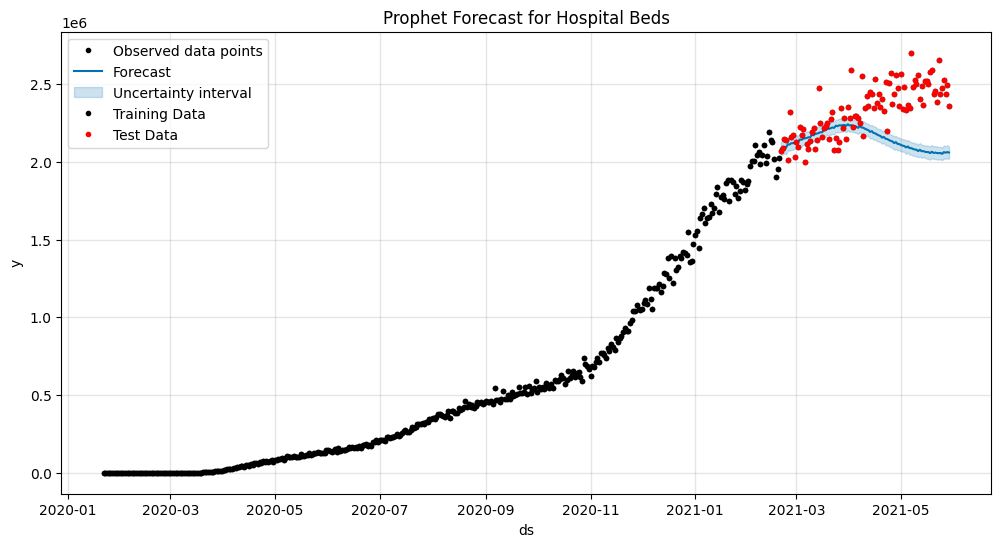

Hospital_Beds - Zeros: 0, Near-zeros (<1): 0
Prophet MAPE (Hospital_Beds): 0.0869
Prophet MAE (Hospital_Beds): 211752.23
Prophet model saved successfully!


In [ ]:
# Prophet Model (Univariate for Hospital_Beds)
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data for Prophet
prophet_df = df_us[['ObservationDate', 'Hospital_Beds', 'Confirmed', 'Deaths', 'Recovered']].copy()
prophet_df.rename(columns={'ObservationDate': 'ds', 'Hospital_Beds': 'y'}, inplace=True)

# Train Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.add_regressor('Confirmed')
prophet_model.add_regressor('Deaths')
prophet_model.add_regressor('Recovered')
prophet_model.fit(prophet_df.iloc[:train_size])

# Create future dataframe for prediction
last_train_date = prophet_df.iloc[:train_size]['ds'].max()
test_dates = df_test['ObservationDate'].values
future_dates = pd.date_range(start=last_train_date + pd.Timedelta(days=1), end=test_dates[-1], freq='D')
future = pd.DataFrame({'ds': future_dates})
future['Confirmed'] = df_test['Confirmed'].values[:len(future_dates)]
future['Deaths'] = df_test['Deaths'].values[:len(future_dates)]
future['Recovered'] = df_test['Recovered'].values[:len(future_dates)]

# Forecast
forecast = prophet_model.predict(future)

# Plot the forecast
fig, ax = plt.subplots(figsize=(12, 6))
prophet_model.plot(forecast, ax=ax)
ax.plot(prophet_df['ds'], prophet_df['y'], 'k.', label='Training Data')
ax.plot(df_test['ObservationDate'], df_test['Hospital_Beds'], 'r.', label='Test Data')
ax.set_title('Prophet Forecast for Hospital Beds')
ax.legend()
plt.show()

# Evaluate
prophet_pred = forecast['yhat'].values
y_test_hospital_beds = df_test['Hospital_Beds'].values[:len(prophet_pred)]

# Check for zeros or near-zeros
zeros = np.sum(y_test_hospital_beds == 0)
near_zeros = np.sum((y_test_hospital_beds > 0) & (y_test_hospital_beds < 1))
print(f"Hospital_Beds - Zeros: {zeros}, Near-zeros (<1): {near_zeros}")

# Calculate MAPE with epsilon
epsilon = 1e-10
prophet_mape = np.mean(np.abs((y_test_hospital_beds - prophet_pred) / (y_test_hospital_beds + epsilon)))
print(f"Prophet MAPE (Hospital_Beds): {prophet_mape:.4f}")

# Calculate MAE
prophet_mae = mean_absolute_error(y_test_hospital_beds, prophet_pred)
print(f"Prophet MAE (Hospital_Beds): {prophet_mae:.2f}")

# Save the model
joblib.dump(prophet_model, '/content/drive/MyDrive/Medical_Resource_Prediction/prophet_model.pkl')
print("Prophet model saved successfully!")

# SARIMA MODEL
# Implementing SARIMA for each target, including data preparation, model fitting, forecasting, evaluation, and saving the model.

# SARIMA (Seasonal Autoregressive Integrated Moving Average) is defined by parameters:
# Non-seasonal components: (p, d, q)
# p: Order of the autoregressive (AR) part.

# d: Degree of differencing (to make the series stationary).

# q: Order of the moving average (MA) part.

# Seasonal components: (P, D, Q, s)
# P: Seasonal AR order.

# D: Seasonal differencing.

# Q: Seasonal MA order.

# s: Seasonal period (e.g., 7 for weekly seasonality in daily data).

# Use the statsmodels library to implement SARIMA and automatically select parameters using auto_arima from pmdarima for efficiency.





In [ ]:
!pip install --upgrade --force-reinstall pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade --no-cache-dir numpy
!pip install --upgrade --no-cache-dir pmdarima

In [ ]:
# Install required libraries
!pip install pmdarima statsmodels

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import joblib
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and Preprocess Data
file_path = '/content/drive/MyDrive/Medical_Resource_Prediction/covid19-dataset-worlwide.csv'
df = pd.read_csv(file_path)
df_us = df[df['Country/Region'] == 'US'].copy()
df_us = df_us.drop(columns=['SNo', 'Last Update', 'Province/State'], errors='ignore')
df_us['Recovered'] = df_us['Recovered'].fillna(0)
df_us['Deaths'] = df_us['Deaths'].fillna(0)

num_records = len(df_us)
np.random.seed(42)
df_us['PPE'] = df_us['Confirmed'] * np.random.uniform(0.1, 0.2, num_records)
df_us['Vaccines'] = df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records)
df_us['Medical_Personnel'] = df_us['Confirmed'] * np.random.uniform(0.01, 0.02, num_records)
df_us['Hospital_Beds'] = np.minimum(df_us['Confirmed'] * np.random.uniform(0.05, 0.1, num_records), 500000)
df_us['ICU'] = df_us['Confirmed'] * np.random.uniform(0.005, 0.01, num_records)
df_us['Ventilators'] = df_us['Confirmed'] * np.random.uniform(0.002, 0.005, num_records)
df_us['Medicines'] = df_us['Confirmed'] * np.random.uniform(0.2, 0.3, num_records)

df_us['ObservationDate'] = pd.to_datetime(df_us['ObservationDate'])
df_us['Day_of_Year'] = df_us['ObservationDate'].dt.dayofyear

# Fill missing dates to ensure consecutive time steps
date_range = pd.date_range(start=df_us['ObservationDate'].min(), end=df_us['ObservationDate'].max(), freq='D')
df_us = df_us.set_index('ObservationDate').reindex(date_range).reset_index()
df_us = df_us.rename(columns={'index': 'ObservationDate'})
df_us['Country/Region'] = 'US'
numerical_cols = ['Confirmed', 'Deaths', 'Recovered', 'PPE', 'Vaccines', 'Medical_Personnel',
                  'Hospital_Beds', 'ICU', 'Ventilators', 'Medicines', 'Day_of_Year']
df_us[numerical_cols] = df_us[numerical_cols].fillna(0)
df_us['Day_of_Year'] = df_us['ObservationDate'].dt.dayofyear

targets = ['PPE', 'Vaccines', 'Medical_Personnel', 'Hospital_Beds', 'ICU', 'Ventilators', 'Medicines']
train_size = int(0.8 * len(df_us))
df_train = df_us.iloc[:train_size]
df_test = df_us.iloc[train_size:]

# Dictionary to store SARIMA models and predictions
sarima_models = {}
sarima_predictions = np.zeros((len(df_test), len(targets)))

# Fit SARIMA model for each target
for i, target in enumerate(targets):
    print(f"Fitting SARIMA model for {target}...")

    # Prepare training data
    train_series = df_train[target]

    # Use auto_arima to find the best SARIMA parameters
    auto_model = auto_arima(
        train_series,
        seasonal=True,
        m=7,  # Weekly seasonality for daily data
        start_p=0, start_q=0,
        max_p=3, max_q=3,
        start_P=0, start_Q=0,
        max_P=2, max_Q=2,
        d=1, D=1,  # Differencing for stationarity
        trace=False,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

    # Get the best SARIMA parameters
    order = auto_model.order
    seasonal_order = auto_model.seasonal_order
    print(f"Best SARIMA parameters for {target}: order={order}, seasonal_order={seasonal_order}")

    # Fit the SARIMA model with the best parameters
    sarima_model = SARIMAX(
        train_series,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    # Forecast on the test set
    forecast = sarima_model.forecast(steps=len(df_test))
    sarima_predictions[:, i] = forecast

    # Store the model
    sarima_models[target] = sarima_model

# Evaluate SARIMA predictions
y_test = df_test[targets].values
epsilon = 1e-10

# Check for zeros or near-zeros
for i, target in enumerate(targets):
    zeros = np.sum(y_test[:, i] == 0)
    near_zeros = np.sum((y_test[:, i] > 0) & (y_test[:, i] < 1))
    print(f"{target} - Zeros: {zeros}, Near-zeros (<1): {near_zeros}")

# Calculate MAPE for each target
sarima_mape_per_target = []
for i, target in enumerate(targets):
    y_true_target = y_test[:, i]
    y_pred_target = sarima_predictions[:, i]
    mape_target = np.mean(np.abs((y_true_target - y_pred_target) / (y_true_target + epsilon)))
    sarima_mape_per_target.append(mape_target)
    print(f"SARIMA MAPE for {target}: {mape_target:.4f}")

sarima_mape = np.mean(sarima_mape_per_target)
print(f"SARIMA Overall MAPE (average across targets): {sarima_mape:.4f}")

# Calculate MAE for each target
sarima_mae_per_target = []
for i, target in enumerate(targets):
    y_true_target = y_test[:, i]
    y_pred_target = sarima_predictions[:, i]
    mae_target = mean_absolute_error(y_true_target, y_pred_target)
    sarima_mae_per_target.append(mae_target)
    print(f"SARIMA MAE for {target}: {mae_target:.2f}")

sarima_mae = np.mean(sarima_mae_per_target)
print(f"SARIMA Overall MAE (average across targets): {sarima_mae:.2f}")

# Plot actual vs predicted for each target
for i, target in enumerate(targets):
    plt.figure(figsize=(10, 6))
    plt.plot(df_train['ObservationDate'], df_train[target], label='Training Data', color='blue')
    plt.plot(df_test['ObservationDate'], y_test[:, i], label='Actual', color='green')
    plt.plot(df_test['ObservationDate'], sarima_predictions[:, i], label='Predicted (SARIMA)', color='red')
    plt.title(f"SARIMA Forecast for {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Save the models
for target, model in sarima_models.items():
    joblib.dump(model, f'/content/drive/MyDrive/Medical_Resource_Prediction/sarima_model_{target}.pkl')
print("SARIMA models saved successfully!")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
!pip install --upgrade --force-reinstall --no-cache-dir pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 129.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 219.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 155.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 180.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load your dataset (adjust the path)
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Medical_Resource_Prediction/owid-covid-data revised.csv')

# Verify load
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  05/01/2020          0.0        0.0   
1      AFG      Asia  Afghanistan  06/01/2020          0.0        0.0   
2      AFG      Asia  Afghanistan  07/01/2020          0.0        0.0   
3      AFG      Asia  Afghanistan  08/01/2020          0.0        0.0   
4      AFG      Asia  Afghanistan  09/01/2020          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
import pandas as pd

# 1. First, check which columns actually exist in your DataFrame
print("Current columns in your DataFrame:")
print(df.columns.tolist())

# 2. Define the columns you want to remove
columns_to_drop = [
    'new_deaths_smoothed',
    'total_cases_per_million',
    'new_cases_per_million',
    'new_cases_smoothed_per_million',
    'total_deaths_per_million',
    'new_deaths_per_million',
    'new_deaths_smoothed_per_million',
    'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions_per_million',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_smoothed',
    'new_tests_smoothed_per_thousand',
    'tests_per_case',
    'tests_units',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred',
    'female_smokers',
    'hospital_beds_per_thousand',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative',
    'excess_mortality_cumulative_per_million'


]

# 3. Filter to only columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# 4. Check which columns will actually be dropped
print("\nColumns that will be dropped:")
print(existing_columns_to_drop)

# 5. Drop only the existing columns
if existing_columns_to_drop:  # Only try to drop if there are columns to drop
    df.drop(columns=existing_columns_to_drop, axis=1, inplace=True)
else:
    print("\nNone of the specified columns exist in the DataFrame")

# 6. Verify the result
print("\nRemaining columns after drop:")
print(df.columns.tolist())

Current columns in your DataFrame:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data revised.csv')

# Display all columns in the DataFrame
print("All available columns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

# Display the number of columns
print(f"\nTotal number of columns: {len(df.columns)}")

All available columns in the dataset:
1. iso_code
2. continent
3. location
4. date
5. total_cases
6. new_cases
7. new_cases_smoothed
8. total_deaths
9. new_deaths
10. new_deaths_smoothed
11. total_cases_per_million
12. new_cases_per_million
13. new_cases_smoothed_per_million
14. total_deaths_per_million
15. new_deaths_per_million
16. new_deaths_smoothed_per_million
17. reproduction_rate
18. icu_patients
19. icu_patients_per_million
20. hosp_patients
21. hosp_patients_per_million
22. weekly_icu_admissions
23. weekly_icu_admissions_per_million
24. weekly_hosp_admissions
25. weekly_hosp_admissions_per_million
26. total_tests
27. new_tests
28. total_tests_per_thousand
29. new_tests_per_thousand
30. new_tests_smoothed
31. new_tests_smoothed_per_thousand
32. positive_rate
33. tests_per_case
34. tests_units
35. total_vaccinations
36. people_vaccinated
37. people_fully_vaccinated
38. total_boosters
39. new_vaccinations
40. new_vaccinations_smoothed
41. total_vaccinations_per_hundred
42. people

In [ ]:
print("Available columns:", df.columns.tolist())

Available columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_pe

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

# df.Describe

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv')

# Display basic statistics
print(df.describe())

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  4.118040e+05  4.101590e+05        4.089290e+05  4.118040e+05   
mean   7.365292e+06  8.017360e+03        8.041026e+03  8.125957e+04   
std    4.477582e+07  2.296649e+05        8.661611e+04  4.411901e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    6.280750e+03  0.000000e+00        0.000000e+00  4.300000e+01   
50%    6.365300e+04  0.000000e+00        1.200000e+01  7.990000e+02   
75%    7.582720e+05  0.000000e+00        3.132860e+02  9.574000e+03   
max    7.758668e+08  4.423623e+07        6.319461e+06  7.057132e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  410608.000000        409378.000000            411804.000000   
mean       71.852139            72.060873            112096.199396   
std      1368.322990           513.636567            162240.412419   
min         0.000000             0.000000                 0.000000   
25%       

# Recommended Feature Set

In [ ]:
selected_features = [
    # Temporal features
    'date',
    'new_cases',
    'new_cases_smoothed',
    'new_deaths',
    'hosp_patients',
    'icu_patients',
    'weekly_hosp_admissions',

    # Transmission dynamics
    'reproduction_rate',
    'positive_rate',

    # Response measures
    'stringency_index',

    # Population factors
    'population',
    'population_density',
    'median_age',
    'aged_65_older',

    # Healthcare capacity
    'hospital_beds_per_thousand',

    # Vaccination
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred'
]

# Implementation Example

In [ ]:
# Load data and select features
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv',
                 parse_dates=['date'])

# Filter for relevant features
model_df = df[selected_features].copy()

# Add temporal features
model_df['day_of_week'] = model_df['date'].dt.dayofweek
model_df['day_of_year'] = model_df['date'].dt.dayofyear

# Add rolling averages
model_df['cases_7day_avg'] = model_df['new_cases'].rolling(7).mean()
model_df['hosp_7day_avg'] = model_df['weekly_hosp_admissions'].rolling(7).mean()

# Calculate derived metrics
model_df['CHR'] = model_df['hosp_patients'] / model_df['total_cases'].replace(0, np.nan)
model_df['bed_occupancy_rate'] = model_df['hosp_patients'] / (model_df['population'] * model_df['hospital_beds_per_thousand']/1000)

# Handle missing values
model_df.fillna(method='ffill', inplace=True)
model_df.fillna(0, inplace=True)

KeyError: 'total_cases'

# Preprocessing Code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv')

# Select relevant features
selected_features = [
    'date',
    'location',
    'new_cases',
    'total_cases',
    'new_deaths',
    'hosp_patients',
    'icu_patients',
    'weekly_hosp_admissions',
    'weekly_icu_admissions',
    'positive_rate',
    'population',
    'population_density',
    'median_age',
    'aged_65_older',
    'diabetes_prevalence',
    'cardiovasc_death_rate',
    'stringency_index',
    'total_vaccinations'
]

# Filter dataset
df = df[selected_features]

# Convert date to datetime and extract temporal features
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear

# Calculate time since first case per country
df['days_since_first_case'] = df.groupby('location')['date'].transform(
    lambda x: (x - x.min()).dt.days
)

# Fill missing values
# Forward fill for time-series data
ts_features = ['hosp_patients', 'icu_patients', 'weekly_hosp_admissions',
               'weekly_icu_admissions', 'positive_rate']
df[ts_features] = df.groupby('location')[ts_features].ffill()

# Fill remaining NAs with 0 or mean
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        if col in ['population', 'population_density', 'median_age',
                  'aged_65_older', 'diabetes_prevalence', 'cardiovasc_death_rate']:
            # Fill demographic data with country mean
            df[col] = df.groupby('location')[col].transform(
                lambda x: x.fillna(x.mean()))
        else:
            df[col] = df[col].fillna(0)

# Create target variables (next day's needs)
df['next_day_hosp'] = df.groupby('location')['hosp_patients'].shift(-1)
df['next_day_icu'] = df.groupby('location')['icu_patients'].shift(-1)

# Remove rows with missing targets (last day for each country)
df = df.dropna(subset=['next_day_hosp', 'next_day_icu'])

# Feature scaling
scaler = StandardScaler()
features_to_scale = [col for col in df.columns if col not in ['date', 'location', 'next_day_hosp', 'next_day_icu']]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Save processed data
df.to_csv('/content/drive/MyDrive/Medical_Resource_Prediction/processed_medical_demand_data.csv', index=False)

# Save scaler for later use
joblib.dump(scaler, '/content/drive/MyDrive/Medical_Resource_Prediction/scaler.pkl')

print("Data preprocessing complete. Processed data saved.")

<ipython-input-28-e2e064bca0f0>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


Data preprocessing complete. Processed data saved.


# Target Variables

In [ ]:
# Calculate additional target variables
df['ventilator_demand'] = df['icu_patients'] * 0.7
df['staff_requirement'] = (df['hosp_patients'] * 0.2) + (df['icu_patients'] * 2.5)
df['antiviral_demand'] = df['new_cases'].rolling(7).mean() * 0.3  # 7-day avg
df['ppe_daily_usage'] = (df['hosp_patients'] * 10) + (df['icu_patients'] * 20)

# Create future targets (next day values)
targets = ['hosp_patients', 'icu_patients', 'ventilator_demand',
           'staff_requirement', 'antiviral_demand', 'ppe_daily_usage']

for target in targets:
    df[f'next_day_{target}'] = df.groupby('location')[target].shift(-1)

# Remove rows with missing targets
df = df.dropna(subset=[f'next_day_{target}' for target in targets])

# Add severity indicators
df['severity_index'] = (df['icu_patients'] / df['icu_patients'].max()) * 0.6 + \
                       (df['weekly_hosp_admissions'] / df['weekly_hosp_admissions'].max()) * 0.4

# Save processed data with all targets
df.to_csv('/content/drive/MyDrive/Medical_Resource_Prediction/processed_data_with_all_targets.csv', index=False)

<ipython-input-29-7c23a6f779e8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['severity_index'] = (df['icu_patients'] / df['icu_patients'].max()) * 0.6 + \


# Initial Data Exploration

# df.head()

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


# df.tail()

In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429434,ZWE,Africa,Zimbabwe,2024-08-04,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


# df.describe()   # Statistical summary (mean, std, min, max, quartiles)

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


# df shape

In [ ]:
#df shape
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv')
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 429435 rows and 67 columns.


# df.info()       # Data types and non-null counts

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

# df.isnull().sum() # Missing values per column

In [ ]:
df.isnull().sum()

,0
iso_code,0
continent,26525
location,0
date,0
total_cases,17631
...,...
population,0
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality,416024


#df.Columns

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# Data Quality & Correlation

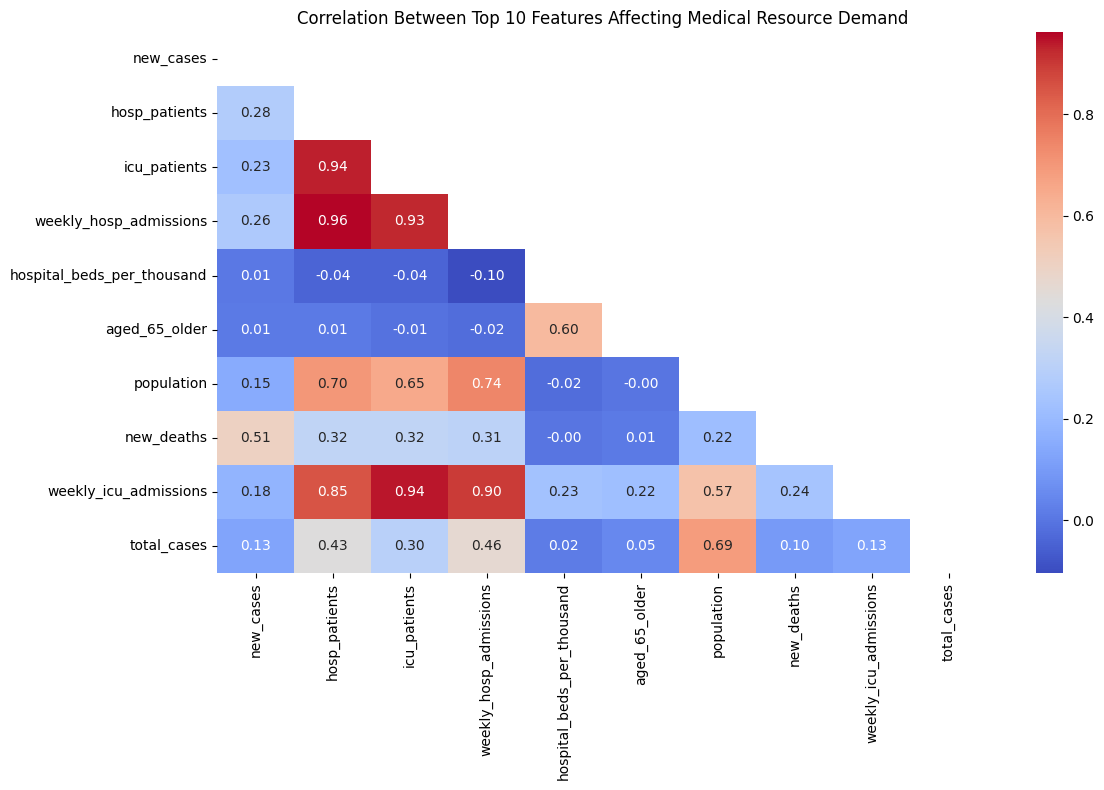

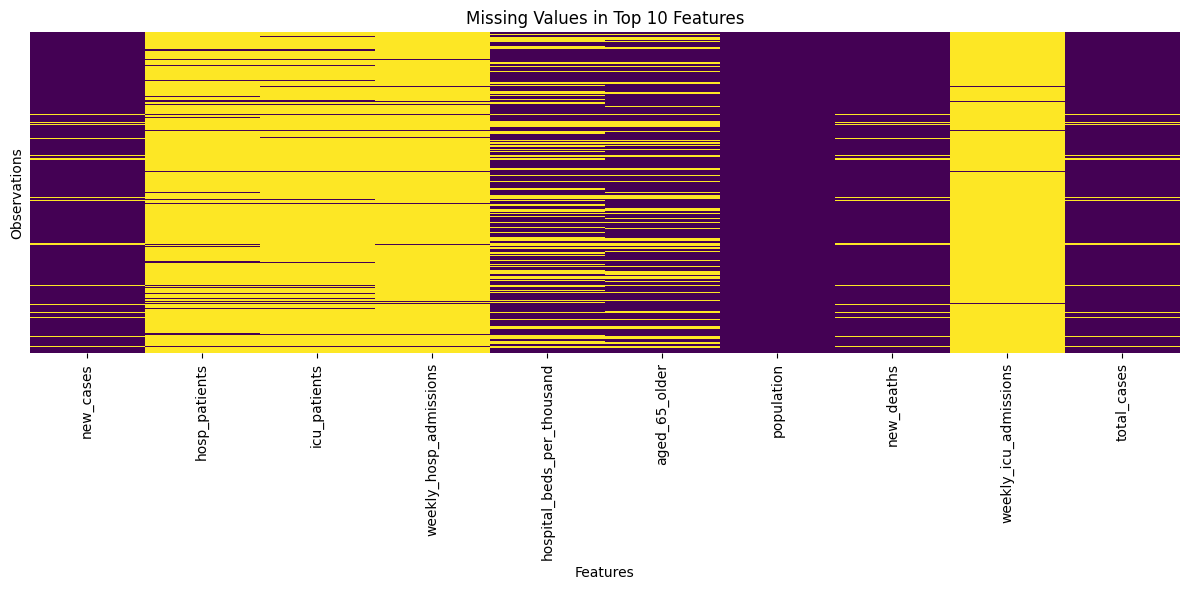

In [ ]:
import numpy as np  # Add this import
import seaborn as sns
import matplotlib.pyplot as plt

# Define the 10 most relevant features
relevant_features = [
    'new_cases', 'hosp_patients', 'icu_patients',
    'weekly_hosp_admissions', 'hospital_beds_per_thousand',
    'aged_65_older', 'population', 'new_deaths',
    'weekly_icu_admissions', 'total_cases'
]

# Filter dataset to relevant features
df_relevant = df[relevant_features]

# 1. Correlation Heatmap (Top 10 Features)
plt.figure(figsize=(12, 8))
corr_matrix = df_relevant.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))  # Hide upper triangle
)
plt.title("Correlation Between Top 10 Features Affecting Medical Resource Demand")
plt.tight_layout()
plt.show()

# 2. Missing Values Visualization (Top 10 Features)
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_relevant.isnull(),
    cbar=False,
    cmap='viridis',
    yticklabels=False
)
plt.title("Missing Values in Top 10 Features")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.tight_layout()
plt.show()

# Outlier Detection

# Demand Distribution

<ipython-input-20-468293a53235>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['hosp_patients'] = df['hosp_patients'].fillna(method='ffill')
<ipython-input-20-468293a53235>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='surging_demand', data=df, palette='viridis')
<ipython-input-20-468293a53235>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


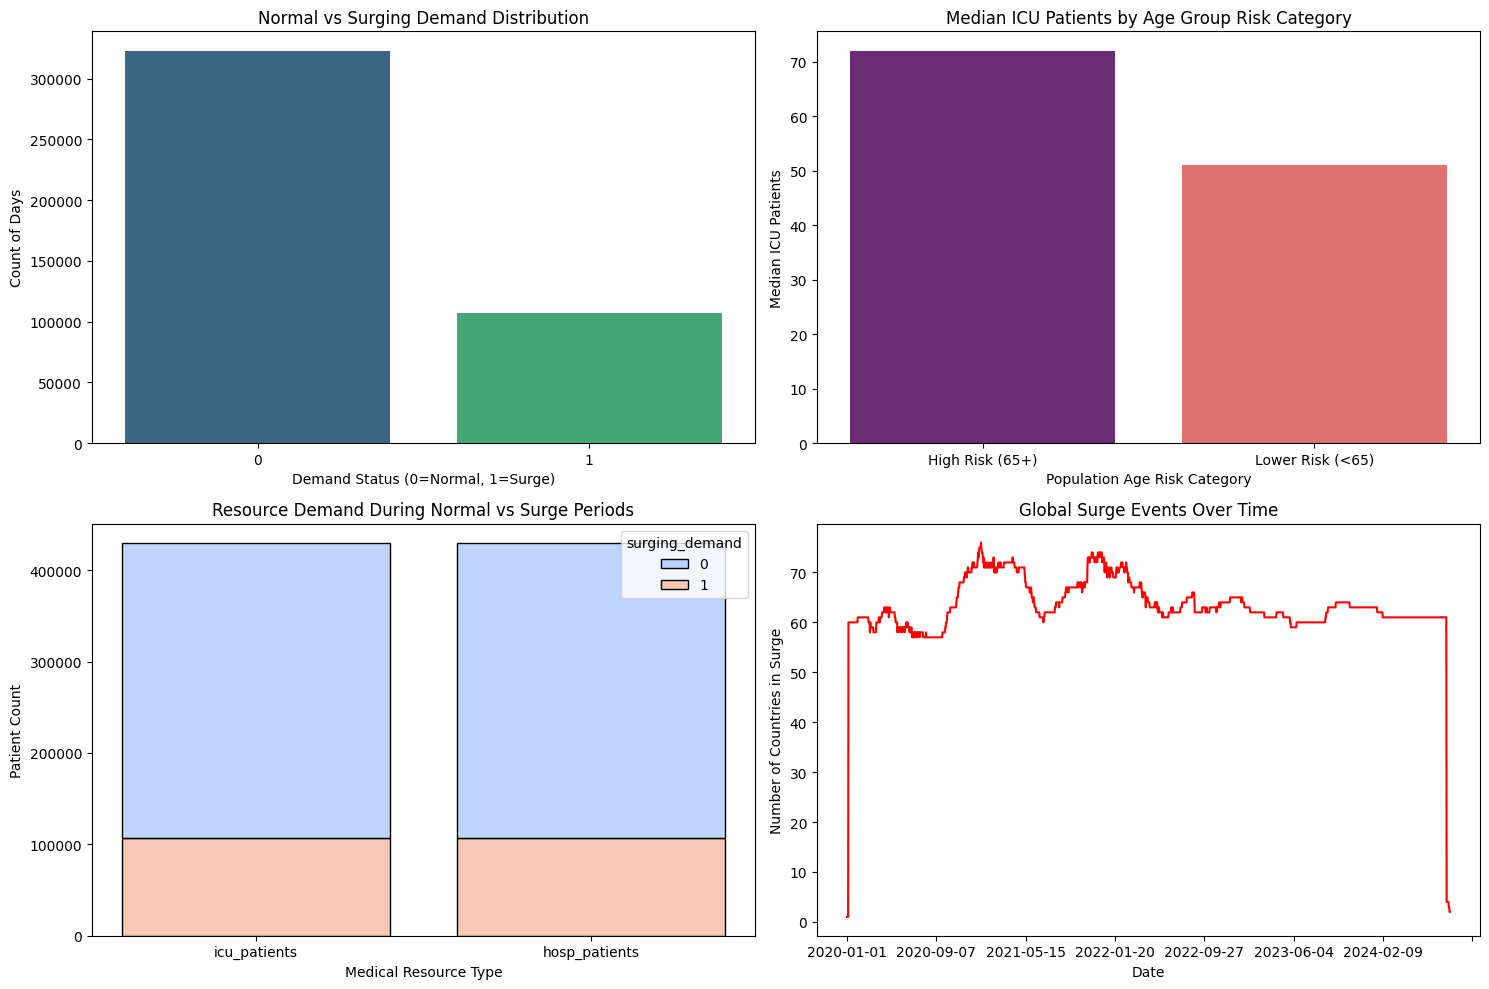

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv')

# Data Cleaning
# ---------------
# 1. Handle missing values for critical columns
df['hosp_patients'] = df['hosp_patients'].fillna(method='ffill')
df['icu_patients'] = df['icu_patients'].fillna(df.groupby('location')['icu_patients'].transform('median'))

# 2. Create Surging Demand Flag
hosp_threshold = df['hosp_patients'].quantile(0.75)
icu_threshold = df['icu_patients'].quantile(0.75)
df['surging_demand'] = np.where(
    (df['hosp_patients'] > hosp_threshold) |
    (df['icu_patients'] > icu_threshold), 1, 0
)

# 3. Create Age Group Risk Categories
df['age_group'] = np.where(
    df['aged_65_older'] > 15, 'High Risk (65+)', 'Lower Risk (<65)'
)

# 4. Prepare Resource Type Data
df_resources = df.melt(
    id_vars=['date', 'location', 'surging_demand'],
    value_vars=['icu_patients', 'hosp_patients'],
    var_name='resource_type',
    value_name='patients'
)

# Visualizations
# ---------------
plt.figure(figsize=(15, 10))

# 1. Demand Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='surging_demand', data=df, palette='viridis')
plt.title('Normal vs Surging Demand Distribution')
plt.xlabel('Demand Status (0=Normal, 1=Surge)')
plt.ylabel('Count of Days')

# 2. Age Group Impact
plt.subplot(2, 2, 2)
sns.barplot(
    x='age_group',
    y='icu_patients',
    data=df.groupby('age_group', as_index=False)['icu_patients'].median(),
    palette='magma'
)
plt.title('Median ICU Patients by Age Group Risk Category')
plt.xlabel('Population Age Risk Category')
plt.ylabel('Median ICU Patients')

# 3. Resource Demand Comparison
plt.subplot(2, 2, 3)
sns.histplot(
    data=df_resources,
    x='resource_type',
    hue='surging_demand',
    multiple='stack',
    palette='coolwarm',
    shrink=0.8
)
plt.title('Resource Demand During Normal vs Surge Periods')
plt.xlabel('Medical Resource Type')
plt.ylabel('Patient Count')

# 4. Time Series of Demand Surges
plt.subplot(2, 2, 4)
surge_dates = df[df['surging_demand'] == 1].groupby('date')['location'].count()
surge_dates.plot(kind='line', color='red')
plt.title('Global Surge Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Countries in Surge')

plt.tight_layout()
plt.show()

# Time Series Analysis

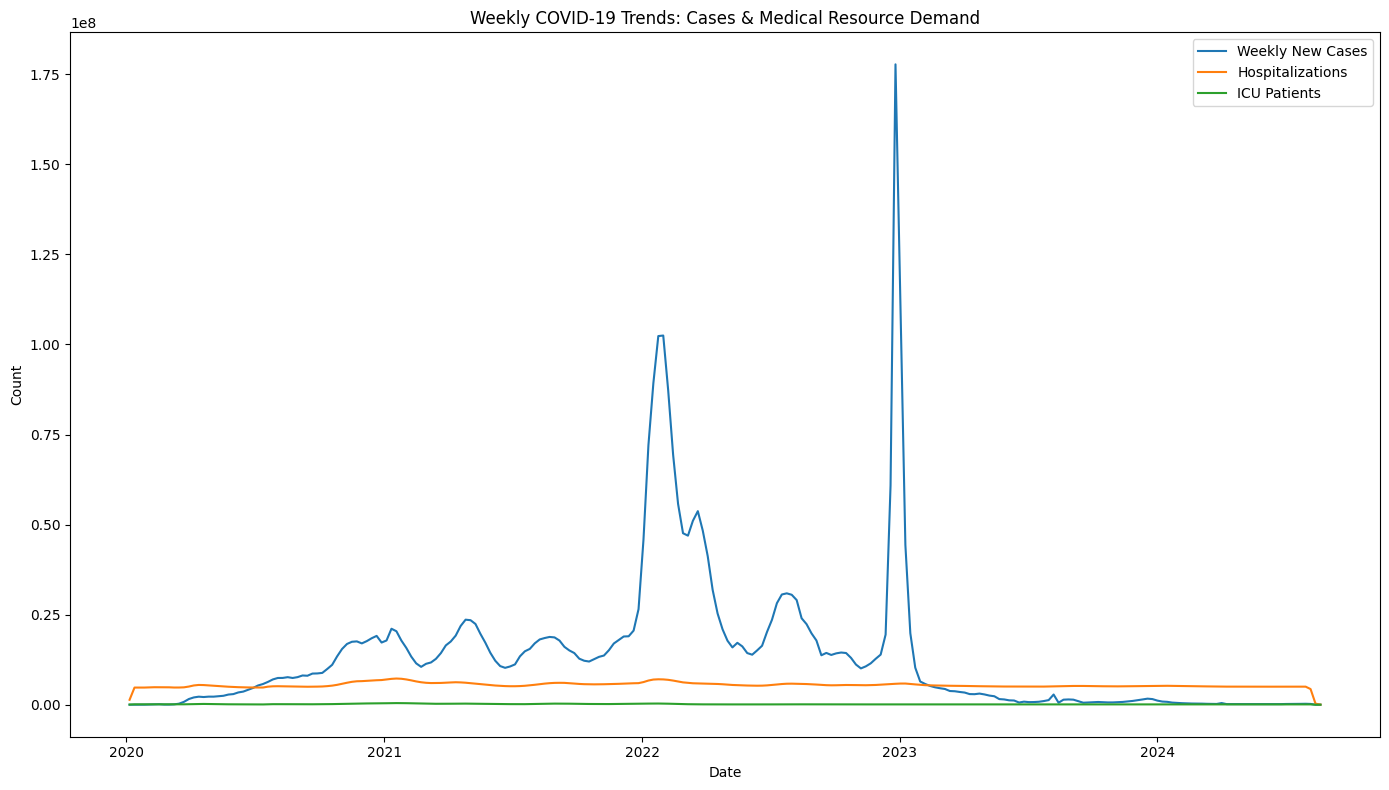

In [ ]:
# Resample weekly trends using 'new_cases' (daily case counts)
df['date'] = pd.to_datetime(df['date'])

# Create weekly aggregates
weekly_trends = df.set_index('date').resample('W-Mon')[[
    'new_cases',
    'hosp_patients',
    'icu_patients'
]].sum().reset_index()

# Plot weekly trends
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='date',
    y='new_cases',
    data=weekly_trends,
    label='Weekly New Cases'
)
sns.lineplot(
    x='date',
    y='hosp_patients',
    data=weekly_trends,
    label='Hospitalizations'
)
sns.lineplot(
    x='date',
    y='icu_patients',
    data=weekly_trends,
    label='ICU Patients'
)
plt.title("Weekly COVID-19 Trends: Cases & Medical Resource Demand")
plt.ylabel("Count")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

# Smoothed daily values

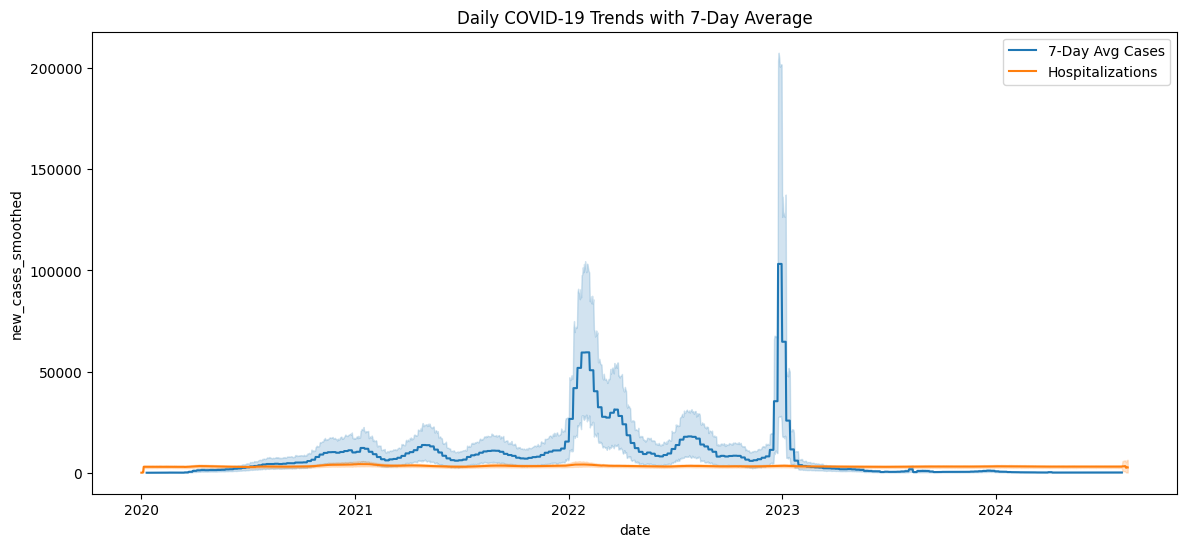

In [ ]:
# For smoothed daily trends (no resampling needed)
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='date',
    y='new_cases_smoothed',
    data=df,
    label='7-Day Avg Cases'
)
sns.lineplot(
    x='date',
    y='hosp_patients',
    data=df,
    label='Hospitalizations'
)
plt.title("Daily COVID-19 Trends with 7-Day Average")
plt.show()

# Prepare Age Groups

In [ ]:
# Create age risk categories
df['age_risk_category'] = pd.cut(
    df['aged_65_older'],
    bins=[0, 5, 15, 30, 100],
    labels=['Low Risk (<5% 65+)', 'Moderate Risk (5-15% 65+)',
            'High Risk (15-30% 65+)', 'Very High Risk (>30% 65+)']
)

# Drop rows missing age data
df = df.dropna(subset=['aged_65_older'])

# Age Group vs. Resource Demand Analysis

# ICU Demand by Age Risk Category

<ipython-input-27-dc51c7aa2028>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=df.groupby('age_risk_category', as_index=False)['icu_patients'].median(),
<ipython-input-27-dc51c7aa2028>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


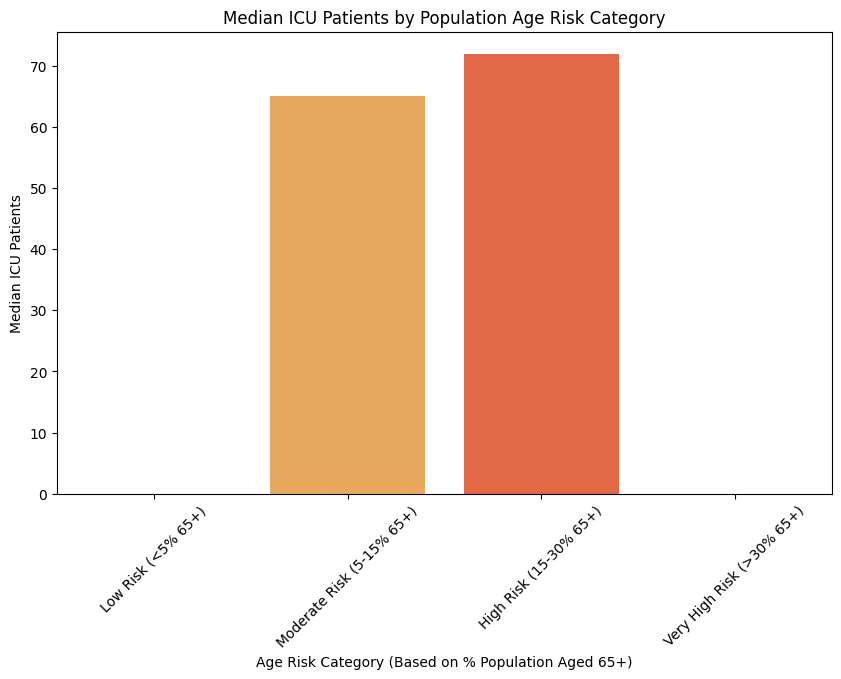

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='age_risk_category',
    y='icu_patients',
    data=df.groupby('age_risk_category', as_index=False)['icu_patients'].median(),
    palette='YlOrRd'
)
plt.title("Median ICU Patients by Population Age Risk Category")
plt.xlabel("Age Risk Category (Based on % Population Aged 65+)")
plt.ylabel("Median ICU Patients")
plt.xticks(rotation=45)
plt.show()

# Hospitalization Trends Over Time by Age Group

<ipython-input-5-8946398d3014>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_risk_category')
<ipython-input-5-8946398d3014>:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['hosp_patients']


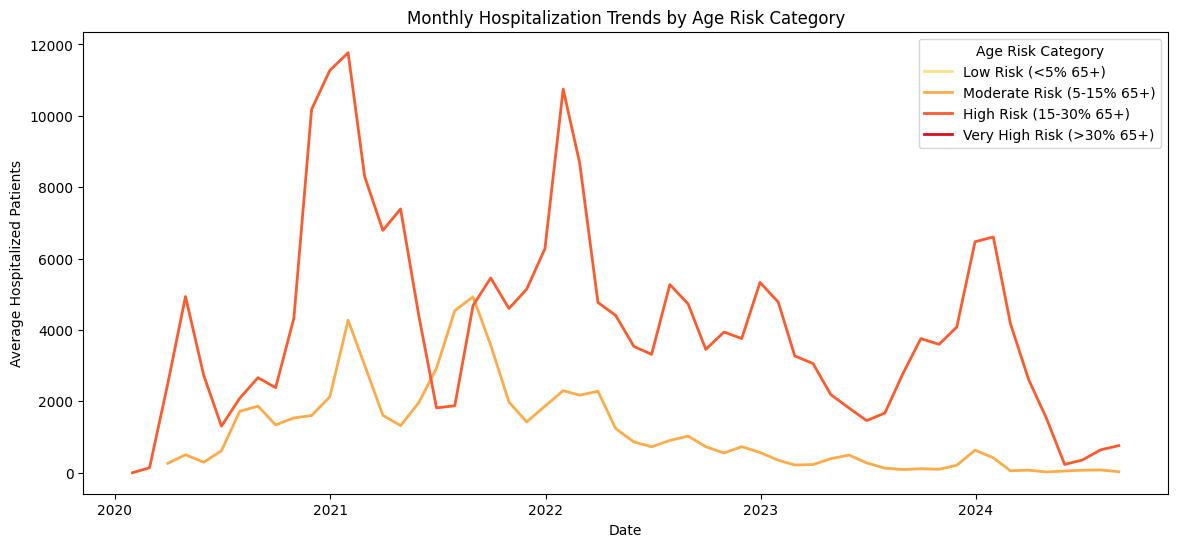

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv')

# 1. Prepare Age Groups
# ------------------------
# Convert date column first
df['date'] = pd.to_datetime(df['date'])

# Create age risk categories
df['age_risk_category'] = pd.cut(
    df['aged_65_older'],
    bins=[0, 5, 15, 30, 100],
    labels=['Low Risk (<5% 65+)', 'Moderate Risk (5-15% 65+)',
            'High Risk (15-30% 65+)', 'Very High Risk (>30% 65+)']
)

# Clean data
df = df.dropna(subset=['aged_65_older', 'hosp_patients'])

# 2. Monthly Hospitalization Trends
# ----------------------------------
monthly_trends = (
    df.set_index('date')
    .groupby('age_risk_category')
    .resample('M')['hosp_patients']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='date',
    y='hosp_patients',
    hue='age_risk_category',
    data=monthly_trends,
    palette='YlOrRd',
    linewidth=2
)
plt.title("Monthly Hospitalization Trends by Age Risk Category")
plt.ylabel("Average Hospitalized Patients")
plt.xlabel("Date")
plt.legend(title="Age Risk Category")
plt.show()

# Statistical Correlation

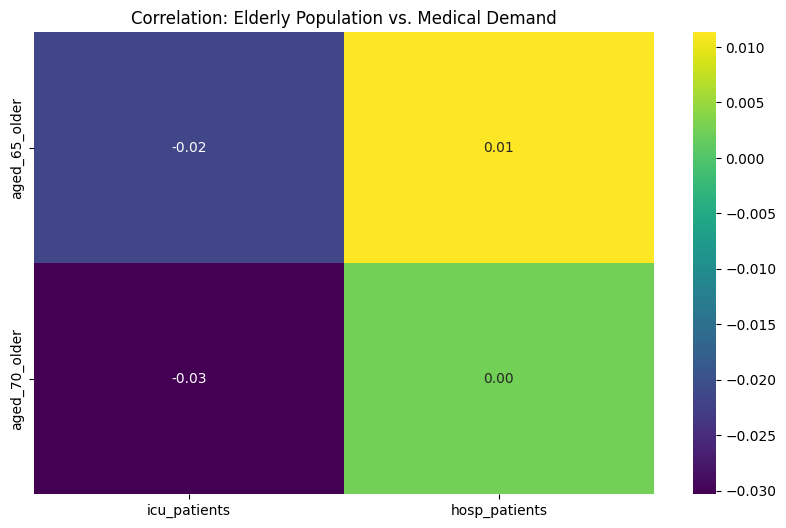

In [ ]:
# Calculate correlation between elderly population % and demand
correlation = df[['aged_65_older', 'aged_70_older',
                'icu_patients', 'hosp_patients']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation.iloc[:2, 2:],  # Compare age cols vs demand cols
    annot=True,
    cmap='viridis',
    fmt='.2f'
)
plt.title("Correlation: Elderly Population vs. Medical Demand")
plt.show()

# Outlier Detection

<ipython-input-7-4d16346242cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


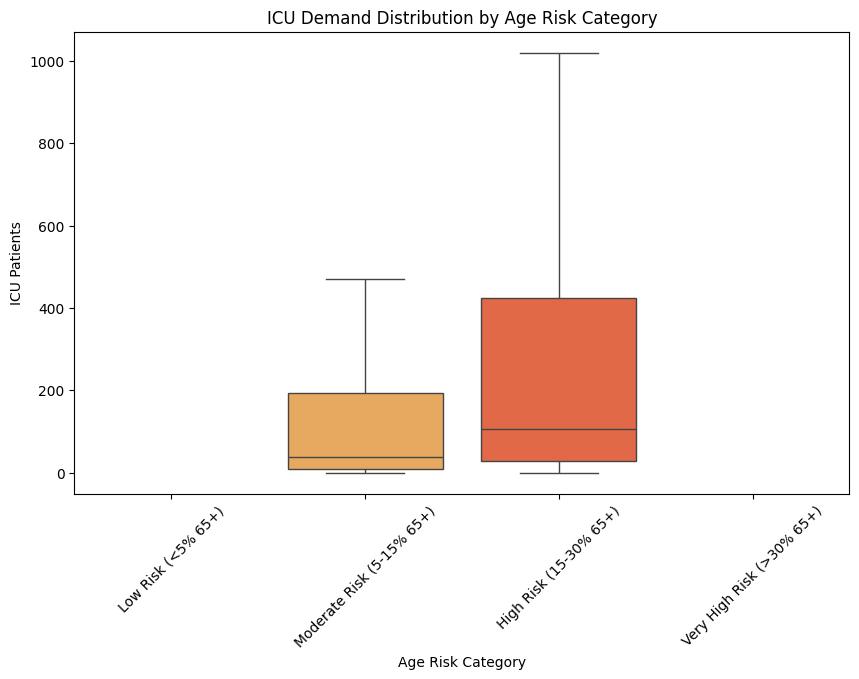

In [ ]:
# Boxplot of ICU demand by age group
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='age_risk_category',
    y='icu_patients',
    data=df,
    palette='YlOrRd',
    showfliers=False  # Remove extreme outliers for readability
)
plt.title("ICU Demand Distribution by Age Risk Category")
plt.xlabel("Age Risk Category")
plt.ylabel("ICU Patients")
plt.xticks(rotation=45)
plt.show()

# Early Warning System

In [ ]:
# Create alert for high-risk regions approaching surge
df['high_risk_alert'] = np.where(
    (df['age_risk_category'].isin(['High Risk', 'Very High Risk'])) &
    (df['new_cases'] > df['new_cases'].quantile(0.75)),
    'Alert',
    'Normal'
)

#  Data Preparation


In [ ]:
# Drop columns with >40% missing data
df.drop(columns=['new_cases_smoothed','new_deaths','new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million','total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million',
       'total_tests_per_thousand', 'new_tests_per_thousand','new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'new_vaccinations_smoothed','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred','gdp_per_capita', 'extreme_poverty', 'handwashing_facilities', 'hospital_beds_per_thousand', 'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million',], inplace=True)





KeyError: "['new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'gdp_per_capita', 'extreme_poverty', 'handwashing_facilities', 'hospital_beds_per_thousand', 'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million'] not found in axis"

In [ ]:
# Calculate missing percentage
missing_pct = df.isnull().mean() * 100

# Get columns with >40% missing data
cols_to_drop = missing_pct[missing_pct > 40].index.tolist()

# Drop these columns (if any exist)
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)
else:
    print("No columns with >40% missing data found")

# Handle Missing Values

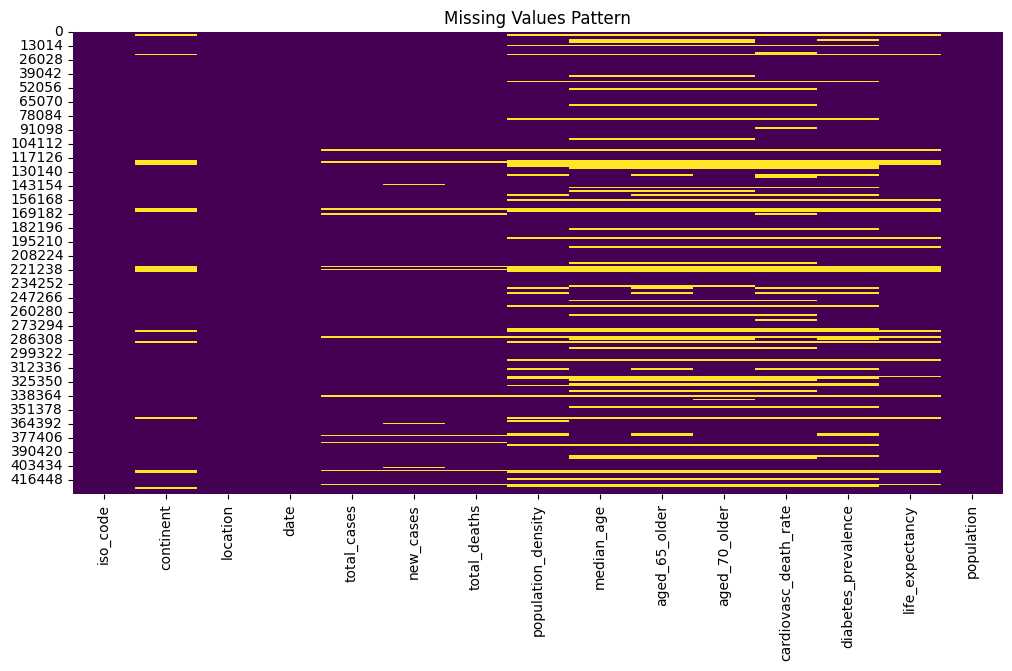

Missing Value Percentages:
aged_65_older            24.722018
cardiovasc_death_rate    23.419144
aged_70_older            22.848627
median_age               22.068998
diabetes_prevalence      19.449742
population_density       16.054350
life_expectancy           9.113370
continent                 6.176721
new_cases                 4.488689
total_cases               4.105627
total_deaths              4.105627
date                      0.000000
location                  0.000000
iso_code                  0.000000
population                0.000000
dtype: float64


In [ ]:
# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Pattern")
plt.show()

# Calculate missing percentages
missing_pct = df.isnull().mean() * 100
print("Missing Value Percentages:")
print(missing_pct.sort_values(ascending=False))

# Drop columns with >40% missing data

In [ ]:
# Drop columns with >40% missing data
cols_to_drop = missing_pct[missing_pct > 40].index.tolist()
df = df.drop(columns=cols_to_drop)

# For remaining missing values:
# A) Time-series data: Forward/backward fill
if 'date' in df.columns:
    df = df.sort_values('date').ffill().bfill()

# B) Numeric columns: Median imputation
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# C) Categorical columns: Mode imputation
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Feature Selection
#Identifying and removing irrelevant columns while keeping those that directly relate to medical resource demand:

In [ ]:

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data revised.csv')
# Columns to keep (relevant to medical resource demand prediction)
relevant_columns = [
    'date', 'location', 'population',

    # Medical resource demand indicators
    'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions'


    # Case/death metrics
    'new_cases', 'new_cases_smoothed', 'new_deaths'

    # Vaccination metrics
    'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',

    # Healthcare system capacity
    'hospital_beds_per_thousand',

    # Population health factors
    'aged_65_older', 'aged_70_older', 'median_age','cardiovasc_death_rate', 'diabetes_prevalence',

    # Other relevant factors
    'reproduction_rate', 'stringency_index'
]

# Columns to remove (irrelevant or redundant)
remove_columns = [col for col in df.columns if col not in relevant_columns]
df = df.drop(columns=remove_columns)

In [ ]:
from IPython.display import display
display(df.head())  # Shows first 5 rows as a clean interactive table

,location,date,new_cases_smoothed,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,people_fully_vaccinated,total_boosters,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,population
0,Afghanistan,05/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,597.029,9.59,0.5,41128772
1,Afghanistan,06/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,597.029,9.59,0.5,41128772
2,Afghanistan,07/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,597.029,9.59,0.5,41128772
3,Afghanistan,08/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,597.029,9.59,0.5,41128772
4,Afghanistan,09/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,597.029,9.59,0.5,41128772


In [ ]:
from tabulate import tabulate
print(tabulate(df.head(), headers='keys', tablefmt='psql', showindex=False))

+-------------+------------+----------------------+---------------------+----------------+-----------------+-------------------------+---------------------------+------------------+---------------------------------+---------------------------------------+--------------------+--------------+-----------------+-----------------+-------------------------+-----------------------+------------------------------+--------------+
| location    | date       |   new_cases_smoothed |   reproduction_rate |   icu_patients |   hosp_patients |   weekly_icu_admissions |   people_fully_vaccinated |   total_boosters |   people_vaccinated_per_hundred |   people_fully_vaccinated_per_hundred |   stringency_index |   median_age |   aged_65_older |   aged_70_older |   cardiovasc_death_rate |   diabetes_prevalence |   hospital_beds_per_thousand |   population |
|-------------+------------+----------------------+---------------------+----------------+-----------------+-------------------------+------------------

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)       # Prevent line-wrapping
pd.set_option('display.max_colwidth', 20)  # Prevent column truncation

In [ ]:
print(df.head(1000))

        location        date  new_cases_smoothed  reproduction_rate  icu_patients  hosp_patients  weekly_icu_admissions  people_fully_vaccinated  total_boosters  people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  stringency_index  median_age  aged_65_older  aged_70_older  cardiovasc_death_rate  diabetes_prevalence  hospital_beds_per_thousand  population
0    Afghanistan  05/01/2020                 NaN                NaN           NaN            NaN                  NaN                    NaN                 NaN                  NaN                            NaN                              0.00        18.6          2.581          1.337              597.029                   9.59                  0.5           41128772
1    Afghanistan  06/01/2020                 NaN                NaN           NaN            NaN                  NaN                    NaN                 NaN                  NaN                            NaN                              0.00        

# Data Cleaning and Imputation
# For the remaining columns, we'll handle missing values appropriately:

In [ ]:
# First, let's verify what columns exist
print("Available columns:", df.columns.tolist())

# Alternative imputation strategy (without relying on 'continent')
imputation_rules = {
    # Medical resource metrics
    'icu_patients': 0,
    'hosp_patients': 0,
    'weekly_icu_admissions': 0,
    'weekly_hosp_admissions': 0,

    # Population metrics - use overall median instead of by continent
    'hospital_beds_per_thousand': df['hospital_beds_per_thousand'].median(),
    'aged_65_older': df['aged_65_older'].median(),
    'aged_70_older': df['aged_70_older'].median(),

    # Vaccination metrics
    'people_vaccinated': 0,
    'people_fully_vaccinated': 0,
    'total_boosters': 0,

    # Other metrics
    'cardiovasc_death_rate': df['cardiovasc_death_rate'].median(),
    'diabetes_prevalence': df['diabetes_prevalence'].median(),
    'reproduction_rate': 1.0,
    'stringency_index': 0
}

# Apply imputation
df = df.fillna(imputation_rules)

# Verify results
print("\nMissing values after imputation:")
print(df.isnull().sum())

Available columns: ['location', 'date', 'new_cases_smoothed', 'reproduction_rate', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'hospital_beds_per_thousand', 'population']

Missing values after imputation:
location                                    0
date                                        0
new_cases_smoothed                      20506
reproduction_rate                           0
icu_patients                                0
hosp_patients                               0
weekly_icu_admissions                       0
people_fully_vaccinated                     0
total_boosters                              0
people_vaccinated_per_hundred          348303
people_fully_vaccinated_per_hundred    351374
stringency_index                          

# Feature Engineering
# Create derived features that will be useful for prediction

In [54]:
# 1. First check what columns are actually available
print("Available columns in your DataFrame:")
print(df.columns.tolist())

# 2. Identify similar columns that might contain case data
possible_case_columns = [col for col in df.columns if 'case' in col.lower()]
print("\nPossible case-related columns:")
print(possible_case_columns)

# 3. Adjust the code based on available columns
if 'new_cases' not in df.columns:
    # Option 1: Use alternative column name if available
    if 'new_cases_smoothed' in df.columns:
        df['case_growth_rate'] = df.groupby('location')['new_cases_smoothed'].pct_change()
        print("Using 'new_cases_smoothed' for growth rate calculation")
    elif len(possible_case_columns) > 0:
        df['case_growth_rate'] = df.groupby('location')[possible_case_columns[0]].pct_change()
        print(f"Using '{possible_case_columns[0]}' for growth rate calculation")
    else:
        print("Warning: No case-related columns found for growth rate calculation")
        df['case_growth_rate'] = np.nan
else:
    df['case_growth_rate'] = df.groupby('location')['new_cases'].pct_change()

# 4. Do the same for hospitalization rates
if 'weekly_hosp_admissions' not in df.columns:
    possible_hosp_columns = [col for col in df.columns if 'hosp' in col.lower()]
    if len(possible_hosp_columns) > 0:
        df['hosp_admission_growth_rate'] = df.groupby('location')[possible_hosp_columns[0]].pct_change()
        print(f"Using '{possible_hosp_columns[0]}' for hospitalization growth rate")
    else:
        print("Warning: No hospitalization columns found")
        df['hosp_admission_growth_rate'] = np.nan
else:
    df['hosp_admission_growth_rate'] = df.groupby('location')['weekly_hosp_admissions'].pct_change()

# 5. Show results
print("\nFirst 5 rows with new growth rate columns:")
print(df[['location', 'date', 'case_growth_rate', 'hosp_admission_growth_rate']].head())

Available columns in your DataFrame:
['location', 'date', 'new_cases_smoothed', 'reproduction_rate', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'hospital_beds_per_thousand', 'population', 'continent']

Possible case-related columns:
['new_cases_smoothed']
Using 'new_cases_smoothed' for growth rate calculation
Using 'hosp_patients' for hospitalization growth rate

First 5 rows with new growth rate columns:
      location        date  case_growth_rate  hosp_admission_growth_rate
0  Afghanistan  05/01/2020               NaN                  NaN       
1  Afghanistan  06/01/2020               NaN                  NaN       
2  Afghanistan  07/01/2020               NaN                  NaN       
3  Afghanistan  08/01/2020               NaN       

<ipython-input-54-aa56a60792f6>:14: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['case_growth_rate'] = df.groupby('location')['new_cases_smoothed'].pct_change()


# Standardize All Column Names

In [55]:
import re

# Standardize column names (handles various naming conventions)
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.lower()                # Convert to lowercase
        .str.replace(r'[^\w]', '_', regex=True)  # Replace special chars with underscore
        .str.replace(r'_+', '_', regex=True)     # Remove duplicate underscores
        .str.strip('_')             # Trim underscores from ends
    )
    return df

df = clean_column_names(df)
print("Standardized columns:", df.columns.tolist())

Standardized columns: ['location', 'date', 'new_cases_smoothed', 'reproduction_rate', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'hospital_beds_per_thousand', 'population', 'continent', 'case_growth_rate', 'hosp_admission_growth_rate']


# Smart Column Detection

In [56]:
def find_best_column(df, possible_names):
    """Find the best matching column from possible names"""
    existing_cols = set(df.columns)
    for name in possible_names:
        if name in existing_cols:
            return name
    # Try partial matches if exact match not found
    for name in possible_names:
        matches = [col for col in existing_cols if name in col]
        if matches:
            return matches[0]
    return None

# Define preferred column names in priority order
case_col = find_best_column(df, ['new_cases', 'daily_cases', 'cases'])
hosp_col = find_best_column(df, ['weekly_hosp_admissions', 'hosp_patients', 'hospitalizations'])

# Safe Calculation with Fallbacks

In [57]:
# Calculate growth rates with automatic column detection
try:
    if case_col:
        df['case_growth_rate'] = df.groupby('location')[case_col].pct_change().fillna(0)
        print(f"Using column '{case_col}' for case growth rate")
    else:
        print("Warning: No case data column found - creating empty feature")
        df['case_growth_rate'] = 0

    if hosp_col:
        df['hosp_growth_rate'] = df.groupby('location')[hosp_col].pct_change().fillna(0)
        print(f"Using column '{hosp_col}' for hospitalization growth rate")
    else:
        print("Warning: No hospitalization data column found - creating empty feature")
        df['hosp_growth_rate'] = 0

except Exception as e:
    print(f"Error in calculations: {str(e)}")
    # Create empty features if calculations fail
    df['case_growth_rate'] = 0
    df['hosp_growth_rate'] = 0

Using column 'new_cases_smoothed' for case growth rate
Using column 'hosp_patients' for hospitalization growth rate


<ipython-input-57-f15068333d8e>:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['case_growth_rate'] = df.groupby('location')[case_col].pct_change().fillna(0)


# Validation and Output

In [58]:
# Show summary of calculated features
print("\nCalculated features summary:")
print(f"{'Case growth rate:':<25} {df['case_growth_rate'].describe()}")
print(f"{'Hospitalization growth rate:':<25} {df['hosp_growth_rate'].describe()}")

# Show sample of results
sample_cols = ['date', 'location', case_col, 'case_growth_rate', hosp_col, 'hosp_growth_rate']
print("\nSample data (showing first 5 rows):")
print(df[sample_cols].head().to_markdown(tablefmt="grid", index=False))


Calculated features summary:
Case growth rate:         count    429435.0
mean          inf
std           NaN
min          -1.0
25%           0.0
50%           0.0
75%           0.0
max           inf
Name: case_growth_rate, dtype: float64
Hospitalization growth rate: count    429435.0
mean          inf
std           NaN
min          -1.0
25%           0.0
50%           0.0
75%           0.0
max           inf
Name: hosp_growth_rate, dtype: float64

Sample data (showing first 5 rows):
+------------+-------------+----------------------+--------------------+-----------------+--------------------+
| date       | location    |   new_cases_smoothed |   case_growth_rate |   hosp_patients |   hosp_growth_rate |
+============+=============+======================+====================+=================+====================+
| 05/01/2020 | Afghanistan |                  nan |                  0 |               0 |                  0 |
+------------+-------------+----------------------+-------------

# Handling Special Cases
# For common COVID-19 dataset variations:

In [59]:
# Common column name variations in COVID datasets
common_aliases = {
    'cases': ['new_cases', 'daily_cases', 'cases_new', 'confirmed_cases'],
    'hospital': ['hosp_patients', 'hospitalized', 'hosp', 'hospitalizations'],
    'icu': ['icu_patients', 'icu_current', 'critical_cases']
}

# Create standardized names
for standard_name, variants in common_aliases.items():
    found_col = find_best_column(df, variants)
    if found_col and standard_name not in df.columns:
        df[standard_name] = df[found_col]
        print(f"Standardized: '{found_col}' → '{standard_name}'")

Standardized: 'new_cases_smoothed' → 'cases'
Standardized: 'hosp_patients' → 'hospital'
Standardized: 'icu_patients' → 'icu'


# : Feature Engineering
# Create derived features that will be useful for prediction:


In [68]:
import pandas as pd
import numpy as np

# 1. First check available columns
print("Available columns:\n", df.columns.tolist())

# Helper function to find best matching column
def find_best_column(df, possible_names):
    """Find the first available column from possible names"""
    for name in possible_names:
        if name in df.columns:
            return name
    return None

# 2. Calculate growth rates with proper error handling
try:
    # Case growth rate
    case_col = find_best_column(df, ['new_cases', 'cases', 'daily_cases'])
    if case_col:
        df['case_growth_rate'] = df.groupby('location')[case_col].apply(
            lambda x: x.pct_change(fill_method=None).fillna(0))
    else:
        df['case_growth_rate'] = 0

    # Hospitalization growth rate
    hosp_col = find_best_column(df, ['weekly_hosp_admissions', 'hosp_patients'])
    if hosp_col:
        df['hosp_growth_rate'] = df.groupby('location')[hosp_col].apply(
            lambda x: x.pct_change(fill_method=None).fillna(0)) # Added indentation here
    else:
        df['hosp_growth_rate'] = 0

except Exception as e:
    print(f"Error in growth rate calculations: {e}")
    df['case_growth_rate'] = 0
    df['hosp_growth_rate'] = 0

# 3. Handle ICU patients column safely
icu_cols = ['icu_patients_per_million', 'icu_patients']
existing_icu_cols = [col for col in icu_cols if col in df.columns]

if existing_icu_cols:
    icu_col = existing_icu_cols[0]
    print(f"Using {icu_col} for ICU calculations")
    # Example ICU utilization calculation if needed:
    if 'hospital_beds_per_thousand' in df.columns:
        df['icu_utilization'] = (df[icu_col] / (df['hospital_beds_per_thousand'] * 1000)).fillna(0)
else:
    print("Warning: No ICU patients columns found in data")
    df['icu_patients_per_million'] = np.nan
    df['icu_utilization'] = np.nan

# 4. Show results
print("\nFirst 5 rows with calculated rates:")
print(df[['date', 'location', 'case_growth_rate', 'hosp_growth_rate']].head().to_markdown(tablefmt="grid"))

Available columns:
 ['location', 'date', 'new_cases_smoothed', 'reproduction_rate', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'hospital_beds_per_thousand', 'population', 'continent', 'case_growth_rate', 'hosp_admission_growth_rate', 'hosp_growth_rate', 'cases', 'hospital', 'icu']
Error in growth rate calculations: incompatible index of inserted column with frame index
Using icu_patients for ICU calculations

First 5 rows with calculated rates:
+----+------------+-------------+--------------------+--------------------+
|    | date       | location    |   case_growth_rate |   hosp_growth_rate |
+====+============+=============+====================+====================+
|  0 | 05/01/2020 | Afghanistan |                  0 |                  0 |

# Target Variable Definition
#Based on theresearch objectives, define target variables for each medical resource:

In [82]:
import pandas as pd
import numpy as np

def safe_feature_engineering(df):
    """Perform all feature engineering with robust error handling"""

    # 1. Standardize column names
    df.columns = df.columns.str.lower().str.replace(r'[^\w]+', '_', regex=True)

    # 2. Define all possible column name variations
    column_variations = {
        'cases': ['new_cases', 'daily_cases', 'cases', 'confirmed_cases'],
        'hospitalizations': ['hosp_patients', 'hospitalized', 'weekly_hosp_admissions'],
        'icu': ['icu_patients', 'icu_patients_per_million']
    }

    # 3. Create standardized column names
    for standard_name, variants in column_variations.items():
        for variant in variants:
            if variant in df.columns:
                df[standard_name] = df[variant]
                break

    # 4. Calculate growth rates with fallbacks
    def safe_pct_change(series):
        try:
            return series.pct_change(fill_method=None).fillna(0)
        except:
            return 0

    if 'cases' in df.columns:
        df['case_growth_rate'] = df.groupby('location')['cases'].transform(safe_pct_change)
    else:
        print("Warning: No case data available - setting growth rate to 0")
        df['case_growth_rate'] = 0

    if 'hospitalizations' in df.columns:
        df['hosp_growth_rate'] = df.groupby('location')['hospitalizations'].transform(safe_pct_change)
    else:
        print("Warning: No hospitalization data available - setting growth rate to 0")
        df['hosp_growth_rate'] = 0

    # 5. Calculate ICU utilization if possible
    if 'icu' in df.columns and 'hospital_beds_per_thousand' in df.columns:
        df['icu_utilization'] = (df['icu'] / (df['hospital_beds_per_thousand'] * 1000)).clip(0, 1).fillna(0)
    else:
        df['icu_utilization'] = np.nan

    return df

# Apply the feature engineering
try:
    df = safe_feature_engineering(df)
    print("Feature engineering completed successfully!")
    print("\nNew columns added:", [col for col in df.columns if col in ['case_growth_rate', 'hosp_growth_rate', 'icu_utilization']])

    # Show sample results
    sample_cols = ['date', 'location', 'cases', 'case_growth_rate',
                   'hospitalizations', 'hosp_growth_rate', 'icu_utilization']
    sample_cols = [col for col in sample_cols if col in df.columns]
    print("\nSample data (first 3 rows):")
    print(df[sample_cols].head(3).to_markdown(tablefmt="grid"))

except Exception as e:
    print(f"Error during feature engineering: {str(e)}")

Feature engineering completed successfully!

New columns added: ['case_growth_rate', 'hosp_growth_rate', 'icu_utilization']

Sample data (first 3 rows):
+----+------------+-------------+---------+--------------------+--------------------+--------------------+-------------------+
|    | date       | location    |   cases |   case_growth_rate |   hospitalizations |   hosp_growth_rate |   icu_utilization |
+====+============+=============+=========+====================+====================+====================+===================+
|  0 | 05/01/2020 | Afghanistan |     nan |                  0 |                  0 |                  0 |                 0 |
+----+------------+-------------+---------+--------------------+--------------------+--------------------+-------------------+
|  1 | 06/01/2020 | Afghanistan |     nan |                  0 |                  0 |                  0 |                 0 |
+----+------------+-------------+---------+--------------------+--------------------+

In [91]:
# Target variables with robust error handling
target_resources = {
    'vaccines_needed': lambda df: df.get('new_cases', 0) * 0.1,  # 10% of new cases need vaccines
    'icu_beds_needed': lambda df: df.get('weekly_icu_admissions', 0) * 7,  # Weekly to daily projection
    'hospital_beds_needed': lambda df: df.get('weekly_hosp_admissions', 0) * 7,
    'ppe_needed': lambda df: df.get('new_cases', 0) * 10,  # 10 PPE items per new case
    'ventilators_needed': lambda df: df.get('icu_patients', 0) * 0.3  # 30% of ICU patients need vents
}

# Add targets to dataframe with validation
for target_name, calculation in target_resources.items():
    try:
        # Calculate with default 0 for missing columns
        df[target_name] = calculation(df)

        # Ensure non-negative values
        df[target_name] = df[target_name].clip(lower=0)

        # Round to whole numbers (can't have half a ventilator)
        df[target_name] = df[target_name].round(0)

        # Cap at reasonable maximum (95% of population if available)
        if 'population' in df.columns:
            df[target_name] = df[target_name].clip(upper=df['population']*0.95)

    except Exception as e:
        print(f"Error calculating {target_name}: {str(e)}")
        df[target_name] = np.nan  # Set to NaN if calculation fails

# Verify targets were created
print("Successfully created target variables:")
print([col for col in df.columns if col.endswith('_needed')])

# Show sample of targets
sample_cols = ['date', 'location'] + [col for col in df.columns if col.endswith('_needed')]
print("\nSample target values:")
print(df[sample_cols].head(3).to_markdown(tablefmt="grid"))

Successfully created target variables:
['icu_beds_needed', 'hospital_beds_needed', 'ventilators_needed', 'ppe_needed', 'medical_staff_needed', 'vaccines_needed']

Sample target values:
+----+------------+-------------+-------------------+------------------------+----------------------+--------------+------------------------+-------------------+
|    | date       | location    |   icu_beds_needed |   hospital_beds_needed |   ventilators_needed |   ppe_needed |   medical_staff_needed |   vaccines_needed |
+====+============+=============+===================+========================+======================+==============+========================+===================+
|  0 | 05/01/2020 | Afghanistan |                 0 |                      0 |                    0 |            0 |                    nan |                 0 |
+----+------------+-------------+-------------------+------------------------+----------------------+--------------+------------------------+-------------------+
|  1 